In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
from copy import deepcopy
from keras.models import Model
from keras.layers import Input,Dense,Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.pooling import MaxPool1D
from keras import optimizers
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
result=sio.loadmat('data7.mat')
data=result['data'][:,::10]
label=result['label']
#data=(data-np.min(data,axis=0))/(np.max(data,axis=0)-np.min(data,axis=0))*2-1
#data=data[:,::10]
#data=np.expand_dims(data,axis=2)
from keras.utils import to_categorical
label=to_categorical(label)
from sklearn.model_selection import StratifiedShuffleSplit

Using TensorFlow backend.


In [6]:
acc=[]

def wgn(x, snr):
    xpower = np.sum(x**2)/len(x)
    npower = xpower * snr
    return np.sqrt(npower)
nsr=np.asarray(list(range(200)))

for ratio in nsr:
    print ('the ratio is', ratio)
    data2=deepcopy(data)
    for index in range(data2.shape[0]):
        data2[index,:]=(data2[index,:].reshape(1,-1)+wgn(data2[index,:], ratio/100)*np.random.randn(1,data2.shape[1]))
        x_train,x_test,y_train,y_test=train_test_split(data2,label,test_size=0.2,random_state=40)
    scaler= preprocessing.StandardScaler().fit(x_train)
    x_train=scaler.transform(x_train)
    x_test=scaler.transform(x_test)
    x_train=np.expand_dims(x_train,axis=2)
    x_test=np.expand_dims(x_test,axis=2)

    input=Input(shape=(41000,1))
    conv1=Conv1D(64,kernel_size=2000,strides=200,activation='relu')(input)
    pool1=MaxPool1D(pool_size=2)(conv1)
    flat1=Flatten(name='flatten')(pool1)
    dense2=Dense(500,activation='relu')(flat1)
    output=Dense(4,activation='softmax',name='result')(dense2)
    model=Model(inputs=input,outputs=output)
    optimizer = optimizers.adam(lr=0.0001)
    model.compile(
            loss='categorical_crossentropy',
            optimizer=optimizer,
            metrics=['accuracy'])
    model.summary()
    hist=model.fit(x_train,y_train, epochs=50,validation_data=(x_test,y_test),verbose=2)
    acc.append(hist.history['val_acc'][-1])
    del model 
    del hist
    del data2
    del x_train
    del x_test

the ratio is 0
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 41000, 1)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 196, 64)           128064    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 98, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               3136500   
_________________________________________________________________
result (Dense)               (None, 4)                 2004      
Total params: 3,266,568
Trainable params: 3,266,568
Non

Epoch 14/50
 - 0s - loss: 0.1754 - acc: 0.9361 - val_loss: 0.3824 - val_acc: 0.8980
Epoch 15/50
 - 0s - loss: 0.1829 - acc: 0.9642 - val_loss: 0.3613 - val_acc: 0.9490
Epoch 16/50
 - 0s - loss: 0.1489 - acc: 0.9719 - val_loss: 0.3580 - val_acc: 0.9082
Epoch 17/50
 - 0s - loss: 0.2599 - acc: 0.8900 - val_loss: 0.5493 - val_acc: 0.8265
Epoch 18/50
 - 0s - loss: 0.1928 - acc: 0.9284 - val_loss: 0.3562 - val_acc: 0.9286
Epoch 19/50
 - 0s - loss: 0.1070 - acc: 0.9642 - val_loss: 0.4003 - val_acc: 0.9082
Epoch 20/50
 - 0s - loss: 0.1296 - acc: 0.9668 - val_loss: 0.3759 - val_acc: 0.9184
Epoch 21/50
 - 0s - loss: 0.0968 - acc: 0.9744 - val_loss: 0.4070 - val_acc: 0.8776
Epoch 22/50
 - 0s - loss: 0.0961 - acc: 0.9668 - val_loss: 0.3797 - val_acc: 0.9082
Epoch 23/50
 - 0s - loss: 0.0755 - acc: 0.9795 - val_loss: 0.3464 - val_acc: 0.9490
Epoch 24/50
 - 0s - loss: 0.0642 - acc: 0.9821 - val_loss: 0.3641 - val_acc: 0.9592
Epoch 25/50
 - 0s - loss: 0.0593 - acc: 0.9898 - val_loss: 0.3830 - val_acc:

Epoch 48/50
 - 0s - loss: 0.0148 - acc: 0.9949 - val_loss: 0.3465 - val_acc: 0.9490
Epoch 49/50
 - 0s - loss: 0.0099 - acc: 0.9974 - val_loss: 0.3594 - val_acc: 0.9490
Epoch 50/50
 - 0s - loss: 0.0107 - acc: 0.9949 - val_loss: 0.3488 - val_acc: 0.9592
the ratio is 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 41000, 1)          0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 196, 64)           128064    
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 98, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 500)               3136500   
_______

Epoch 18/50
 - 0s - loss: 0.1016 - acc: 0.9693 - val_loss: 0.3700 - val_acc: 0.9082
Epoch 19/50
 - 0s - loss: 0.0800 - acc: 0.9847 - val_loss: 0.3598 - val_acc: 0.9388
Epoch 20/50
 - 0s - loss: 0.0731 - acc: 0.9872 - val_loss: 0.3943 - val_acc: 0.9184
Epoch 21/50
 - 0s - loss: 0.0810 - acc: 0.9795 - val_loss: 0.4541 - val_acc: 0.9082
Epoch 22/50
 - 0s - loss: 0.1351 - acc: 0.9437 - val_loss: 0.4270 - val_acc: 0.8673
Epoch 23/50
 - 0s - loss: 0.0835 - acc: 0.9668 - val_loss: 0.4529 - val_acc: 0.8571
Epoch 24/50
 - 0s - loss: 0.0735 - acc: 0.9770 - val_loss: 0.3877 - val_acc: 0.9286
Epoch 25/50
 - 0s - loss: 0.0586 - acc: 0.9872 - val_loss: 0.3847 - val_acc: 0.9082
Epoch 26/50
 - 0s - loss: 0.0671 - acc: 0.9872 - val_loss: 0.4073 - val_acc: 0.9286
Epoch 27/50
 - 0s - loss: 0.0733 - acc: 0.9693 - val_loss: 0.3740 - val_acc: 0.9184
Epoch 28/50
 - 0s - loss: 0.0446 - acc: 0.9898 - val_loss: 0.3923 - val_acc: 0.9286
Epoch 29/50
 - 0s - loss: 0.0296 - acc: 0.9974 - val_loss: 0.3793 - val_acc:

 - 0s - loss: 0.8381 - acc: 0.5678 - val_loss: 0.6127 - val_acc: 0.7245
Epoch 2/50
 - 0s - loss: 0.4541 - acc: 0.7647 - val_loss: 0.4434 - val_acc: 0.8265
Epoch 3/50
 - 0s - loss: 0.3976 - acc: 0.7980 - val_loss: 0.6180 - val_acc: 0.7143
Epoch 4/50
 - 0s - loss: 0.3910 - acc: 0.8082 - val_loss: 0.5547 - val_acc: 0.7449
Epoch 5/50
 - 0s - loss: 0.4230 - acc: 0.7647 - val_loss: 0.5943 - val_acc: 0.7551
Epoch 6/50
 - 0s - loss: 0.3541 - acc: 0.8005 - val_loss: 0.4982 - val_acc: 0.7755
Epoch 7/50
 - 0s - loss: 0.3285 - acc: 0.8210 - val_loss: 0.5587 - val_acc: 0.7245
Epoch 8/50
 - 0s - loss: 0.2992 - acc: 0.8465 - val_loss: 0.4589 - val_acc: 0.8673
Epoch 9/50
 - 0s - loss: 0.2832 - acc: 0.8542 - val_loss: 0.4624 - val_acc: 0.8571
Epoch 10/50
 - 0s - loss: 0.2431 - acc: 0.9284 - val_loss: 0.4470 - val_acc: 0.8673
Epoch 11/50
 - 0s - loss: 0.2378 - acc: 0.9028 - val_loss: 0.4912 - val_acc: 0.7959
Epoch 12/50
 - 0s - loss: 0.2167 - acc: 0.9156 - val_loss: 0.4378 - val_acc: 0.8673
Epoch 13/50


Epoch 35/50
 - 0s - loss: 0.0215 - acc: 1.0000 - val_loss: 0.3479 - val_acc: 0.9388
Epoch 36/50
 - 0s - loss: 0.0141 - acc: 1.0000 - val_loss: 0.3388 - val_acc: 0.9490
Epoch 37/50
 - 0s - loss: 0.0105 - acc: 1.0000 - val_loss: 0.3542 - val_acc: 0.9490
Epoch 38/50
 - 0s - loss: 0.0102 - acc: 1.0000 - val_loss: 0.3657 - val_acc: 0.9490
Epoch 39/50
 - 0s - loss: 0.0097 - acc: 1.0000 - val_loss: 0.3503 - val_acc: 0.9592
Epoch 40/50
 - 0s - loss: 0.0085 - acc: 1.0000 - val_loss: 0.3495 - val_acc: 0.9490
Epoch 41/50
 - 0s - loss: 0.0102 - acc: 0.9974 - val_loss: 0.3579 - val_acc: 0.9592
Epoch 42/50
 - 0s - loss: 0.0147 - acc: 0.9974 - val_loss: 0.3668 - val_acc: 0.9592
Epoch 43/50
 - 0s - loss: 0.0096 - acc: 0.9974 - val_loss: 0.3548 - val_acc: 0.9592
Epoch 44/50
 - 0s - loss: 0.0091 - acc: 0.9974 - val_loss: 0.3628 - val_acc: 0.9592
Epoch 45/50
 - 0s - loss: 0.0054 - acc: 1.0000 - val_loss: 0.3586 - val_acc: 0.9592
Epoch 46/50
 - 0s - loss: 0.0047 - acc: 1.0000 - val_loss: 0.3651 - val_acc:

Epoch 5/50
 - 0s - loss: 0.3183 - acc: 0.8465 - val_loss: 0.4367 - val_acc: 0.8673
Epoch 6/50
 - 0s - loss: 0.2899 - acc: 0.8772 - val_loss: 0.4298 - val_acc: 0.8571
Epoch 7/50
 - 0s - loss: 0.2780 - acc: 0.8772 - val_loss: 0.5022 - val_acc: 0.7347
Epoch 8/50
 - 0s - loss: 0.2358 - acc: 0.9003 - val_loss: 0.4612 - val_acc: 0.7857
Epoch 9/50
 - 0s - loss: 0.2418 - acc: 0.8772 - val_loss: 0.4439 - val_acc: 0.8265
Epoch 10/50
 - 0s - loss: 0.2315 - acc: 0.9207 - val_loss: 0.4176 - val_acc: 0.8776
Epoch 11/50
 - 0s - loss: 0.2483 - acc: 0.8721 - val_loss: 0.3929 - val_acc: 0.8980
Epoch 12/50
 - 0s - loss: 0.1974 - acc: 0.9386 - val_loss: 0.4803 - val_acc: 0.8061
Epoch 13/50
 - 0s - loss: 0.1978 - acc: 0.9105 - val_loss: 0.5023 - val_acc: 0.7959
Epoch 14/50
 - 0s - loss: 0.1518 - acc: 0.9514 - val_loss: 0.4334 - val_acc: 0.8571
Epoch 15/50
 - 0s - loss: 0.1544 - acc: 0.9361 - val_loss: 0.4375 - val_acc: 0.8265
Epoch 16/50
 - 0s - loss: 0.1578 - acc: 0.9463 - val_loss: 0.4517 - val_acc: 0.86

Epoch 39/50
 - 0s - loss: 0.0086 - acc: 1.0000 - val_loss: 0.3382 - val_acc: 0.9592
Epoch 40/50
 - 0s - loss: 0.0077 - acc: 1.0000 - val_loss: 0.3432 - val_acc: 0.9592
Epoch 41/50
 - 0s - loss: 0.0068 - acc: 1.0000 - val_loss: 0.3516 - val_acc: 0.9592
Epoch 42/50
 - 0s - loss: 0.0065 - acc: 1.0000 - val_loss: 0.3426 - val_acc: 0.9592
Epoch 43/50
 - 0s - loss: 0.0057 - acc: 1.0000 - val_loss: 0.3462 - val_acc: 0.9592
Epoch 44/50
 - 0s - loss: 0.0052 - acc: 1.0000 - val_loss: 0.3435 - val_acc: 0.9592
Epoch 45/50
 - 0s - loss: 0.0050 - acc: 1.0000 - val_loss: 0.3443 - val_acc: 0.9592
Epoch 46/50
 - 0s - loss: 0.0055 - acc: 1.0000 - val_loss: 0.3665 - val_acc: 0.9388
Epoch 47/50
 - 0s - loss: 0.0046 - acc: 1.0000 - val_loss: 0.3466 - val_acc: 0.9592
Epoch 48/50
 - 0s - loss: 0.0043 - acc: 1.0000 - val_loss: 0.3448 - val_acc: 0.9490
Epoch 49/50
 - 0s - loss: 0.0045 - acc: 1.0000 - val_loss: 0.3596 - val_acc: 0.9592
Epoch 50/50
 - 0s - loss: 0.0049 - acc: 1.0000 - val_loss: 0.3471 - val_acc:

Epoch 9/50
 - 0s - loss: 0.2672 - acc: 0.9130 - val_loss: 0.4690 - val_acc: 0.8469
Epoch 10/50
 - 0s - loss: 0.2407 - acc: 0.9156 - val_loss: 0.4410 - val_acc: 0.9082
Epoch 11/50
 - 0s - loss: 0.2230 - acc: 0.9079 - val_loss: 0.4252 - val_acc: 0.8878
Epoch 12/50
 - 0s - loss: 0.2444 - acc: 0.8926 - val_loss: 0.4470 - val_acc: 0.8367
Epoch 13/50
 - 0s - loss: 0.2002 - acc: 0.9335 - val_loss: 0.4850 - val_acc: 0.8061
Epoch 14/50
 - 0s - loss: 0.1628 - acc: 0.9386 - val_loss: 0.4232 - val_acc: 0.8776
Epoch 15/50
 - 0s - loss: 0.1349 - acc: 0.9719 - val_loss: 0.3846 - val_acc: 0.9184
Epoch 16/50
 - 0s - loss: 0.1130 - acc: 0.9872 - val_loss: 0.4088 - val_acc: 0.8776
Epoch 17/50
 - 0s - loss: 0.1053 - acc: 0.9795 - val_loss: 0.4147 - val_acc: 0.8878
Epoch 18/50
 - 0s - loss: 0.0944 - acc: 0.9898 - val_loss: 0.4306 - val_acc: 0.8469
Epoch 19/50
 - 0s - loss: 0.1287 - acc: 0.9540 - val_loss: 0.5204 - val_acc: 0.8367
Epoch 20/50
 - 0s - loss: 0.1142 - acc: 0.9591 - val_loss: 0.4840 - val_acc: 

Epoch 43/50
 - 0s - loss: 0.0045 - acc: 1.0000 - val_loss: 0.3532 - val_acc: 0.9592
Epoch 44/50
 - 0s - loss: 0.0042 - acc: 1.0000 - val_loss: 0.3524 - val_acc: 0.9388
Epoch 45/50
 - 0s - loss: 0.0039 - acc: 1.0000 - val_loss: 0.3556 - val_acc: 0.9592
Epoch 46/50
 - 0s - loss: 0.0037 - acc: 1.0000 - val_loss: 0.3554 - val_acc: 0.9388
Epoch 47/50
 - 0s - loss: 0.0035 - acc: 1.0000 - val_loss: 0.3610 - val_acc: 0.9592
Epoch 48/50
 - 0s - loss: 0.0035 - acc: 1.0000 - val_loss: 0.3560 - val_acc: 0.9490
Epoch 49/50
 - 0s - loss: 0.0032 - acc: 1.0000 - val_loss: 0.3582 - val_acc: 0.9592
Epoch 50/50
 - 0s - loss: 0.0031 - acc: 1.0000 - val_loss: 0.3587 - val_acc: 0.9592
the ratio is 14
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        (None, 41000, 1)          0         
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 196, 64)    

Epoch 13/50
 - 0s - loss: 0.1674 - acc: 0.9386 - val_loss: 0.4495 - val_acc: 0.8265
Epoch 14/50
 - 0s - loss: 0.1320 - acc: 0.9795 - val_loss: 0.4290 - val_acc: 0.8878
Epoch 15/50
 - 0s - loss: 0.1282 - acc: 0.9719 - val_loss: 0.3875 - val_acc: 0.9286
Epoch 16/50
 - 0s - loss: 0.1256 - acc: 0.9642 - val_loss: 0.4103 - val_acc: 0.8776
Epoch 17/50
 - 0s - loss: 0.1154 - acc: 0.9642 - val_loss: 0.4226 - val_acc: 0.8571
Epoch 18/50
 - 0s - loss: 0.0946 - acc: 0.9821 - val_loss: 0.3821 - val_acc: 0.8878
Epoch 19/50
 - 0s - loss: 0.0979 - acc: 0.9693 - val_loss: 0.3918 - val_acc: 0.8878
Epoch 20/50
 - 0s - loss: 0.0596 - acc: 0.9949 - val_loss: 0.3708 - val_acc: 0.9184
Epoch 21/50
 - 0s - loss: 0.0556 - acc: 0.9898 - val_loss: 0.3765 - val_acc: 0.9082
Epoch 22/50
 - 0s - loss: 0.0478 - acc: 0.9974 - val_loss: 0.3468 - val_acc: 0.9592
Epoch 23/50
 - 0s - loss: 0.0391 - acc: 0.9974 - val_loss: 0.3513 - val_acc: 0.9388
Epoch 24/50
 - 0s - loss: 0.0323 - acc: 1.0000 - val_loss: 0.3722 - val_acc:

Epoch 47/50
 - 0s - loss: 0.0039 - acc: 1.0000 - val_loss: 0.3855 - val_acc: 0.9286
Epoch 48/50
 - 0s - loss: 0.0036 - acc: 1.0000 - val_loss: 0.3836 - val_acc: 0.9388
Epoch 49/50
 - 0s - loss: 0.0039 - acc: 1.0000 - val_loss: 0.3850 - val_acc: 0.9388
Epoch 50/50
 - 0s - loss: 0.0033 - acc: 1.0000 - val_loss: 0.3766 - val_acc: 0.9388
the ratio is 17
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        (None, 41000, 1)          0         
_________________________________________________________________
conv1d_18 (Conv1D)           (None, 196, 64)           128064    
_________________________________________________________________
max_pooling1d_18 (MaxPooling (None, 98, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
______________________________________________________

Epoch 17/50
 - 0s - loss: 0.0889 - acc: 0.9770 - val_loss: 0.4247 - val_acc: 0.8673
Epoch 18/50
 - 0s - loss: 0.0632 - acc: 0.9949 - val_loss: 0.3765 - val_acc: 0.9184
Epoch 19/50
 - 0s - loss: 0.0561 - acc: 0.9974 - val_loss: 0.3647 - val_acc: 0.9388
Epoch 20/50
 - 0s - loss: 0.0444 - acc: 0.9974 - val_loss: 0.3975 - val_acc: 0.8980
Epoch 21/50
 - 0s - loss: 0.0372 - acc: 0.9974 - val_loss: 0.3634 - val_acc: 0.9286
Epoch 22/50
 - 0s - loss: 0.0272 - acc: 1.0000 - val_loss: 0.3548 - val_acc: 0.9286
Epoch 23/50
 - 0s - loss: 0.0251 - acc: 1.0000 - val_loss: 0.3645 - val_acc: 0.9082
Epoch 24/50
 - 0s - loss: 0.0275 - acc: 1.0000 - val_loss: 0.3715 - val_acc: 0.9286
Epoch 25/50
 - 0s - loss: 0.0244 - acc: 0.9974 - val_loss: 0.3673 - val_acc: 0.9388
Epoch 26/50
 - 0s - loss: 0.0287 - acc: 0.9974 - val_loss: 0.3566 - val_acc: 0.9388
Epoch 27/50
 - 0s - loss: 0.0222 - acc: 1.0000 - val_loss: 0.3801 - val_acc: 0.9286
Epoch 28/50
 - 0s - loss: 0.0150 - acc: 1.0000 - val_loss: 0.3646 - val_acc:

the ratio is 20
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_21 (InputLayer)        (None, 41000, 1)          0         
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 196, 64)           128064    
_________________________________________________________________
max_pooling1d_21 (MaxPooling (None, 98, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 500)               3136500   
_________________________________________________________________
result (Dense)               (None, 4)                 2004      
Total params: 3,266,568
Trainable params: 3,266,568
Non-trainable params: 0
__________________________________________________

Epoch 21/50
 - 0s - loss: 0.0322 - acc: 1.0000 - val_loss: 0.3729 - val_acc: 0.9388
Epoch 22/50
 - 0s - loss: 0.0283 - acc: 1.0000 - val_loss: 0.3761 - val_acc: 0.9286
Epoch 23/50
 - 0s - loss: 0.0227 - acc: 1.0000 - val_loss: 0.3744 - val_acc: 0.9286
Epoch 24/50
 - 0s - loss: 0.0190 - acc: 1.0000 - val_loss: 0.3946 - val_acc: 0.9286
Epoch 25/50
 - 0s - loss: 0.0212 - acc: 1.0000 - val_loss: 0.3679 - val_acc: 0.9388
Epoch 26/50
 - 0s - loss: 0.0159 - acc: 1.0000 - val_loss: 0.3748 - val_acc: 0.9388
Epoch 27/50
 - 0s - loss: 0.0156 - acc: 1.0000 - val_loss: 0.3629 - val_acc: 0.9184
Epoch 28/50
 - 0s - loss: 0.0121 - acc: 1.0000 - val_loss: 0.3648 - val_acc: 0.9286
Epoch 29/50
 - 0s - loss: 0.0128 - acc: 1.0000 - val_loss: 0.3631 - val_acc: 0.9286
Epoch 30/50
 - 0s - loss: 0.0105 - acc: 1.0000 - val_loss: 0.3777 - val_acc: 0.9286
Epoch 31/50
 - 0s - loss: 0.0117 - acc: 1.0000 - val_loss: 0.3576 - val_acc: 0.9388
Epoch 32/50
 - 0s - loss: 0.0095 - acc: 1.0000 - val_loss: 0.3737 - val_acc:

 - 1s - loss: 0.9721 - acc: 0.5243 - val_loss: 0.6219 - val_acc: 0.6735
Epoch 2/50
 - 0s - loss: 0.4589 - acc: 0.7775 - val_loss: 0.4884 - val_acc: 0.7857
Epoch 3/50
 - 0s - loss: 0.3734 - acc: 0.8261 - val_loss: 0.5072 - val_acc: 0.7653
Epoch 4/50
 - 0s - loss: 0.3546 - acc: 0.7852 - val_loss: 0.5191 - val_acc: 0.7245
Epoch 5/50
 - 0s - loss: 0.2872 - acc: 0.8900 - val_loss: 0.4655 - val_acc: 0.8265
Epoch 6/50
 - 0s - loss: 0.2775 - acc: 0.8747 - val_loss: 0.5342 - val_acc: 0.7551
Epoch 7/50
 - 0s - loss: 0.2672 - acc: 0.8900 - val_loss: 0.4741 - val_acc: 0.8571
Epoch 8/50
 - 0s - loss: 0.2286 - acc: 0.9386 - val_loss: 0.4670 - val_acc: 0.8469
Epoch 9/50
 - 0s - loss: 0.1866 - acc: 0.9565 - val_loss: 0.4492 - val_acc: 0.8163
Epoch 10/50
 - 0s - loss: 0.1741 - acc: 0.9616 - val_loss: 0.4453 - val_acc: 0.8878
Epoch 11/50
 - 0s - loss: 0.1454 - acc: 0.9795 - val_loss: 0.4400 - val_acc: 0.8571
Epoch 12/50
 - 0s - loss: 0.1155 - acc: 0.9847 - val_loss: 0.4072 - val_acc: 0.8673
Epoch 13/50


Epoch 35/50
 - 0s - loss: 0.0082 - acc: 1.0000 - val_loss: 0.3571 - val_acc: 0.9286
Epoch 36/50
 - 0s - loss: 0.0072 - acc: 1.0000 - val_loss: 0.3537 - val_acc: 0.9286
Epoch 37/50
 - 0s - loss: 0.0070 - acc: 1.0000 - val_loss: 0.3603 - val_acc: 0.9388
Epoch 38/50
 - 0s - loss: 0.0063 - acc: 1.0000 - val_loss: 0.3497 - val_acc: 0.9388
Epoch 39/50
 - 0s - loss: 0.0056 - acc: 1.0000 - val_loss: 0.3506 - val_acc: 0.9388
Epoch 40/50
 - 0s - loss: 0.0050 - acc: 1.0000 - val_loss: 0.3492 - val_acc: 0.9388
Epoch 41/50
 - 0s - loss: 0.0047 - acc: 1.0000 - val_loss: 0.3478 - val_acc: 0.9388
Epoch 42/50
 - 0s - loss: 0.0044 - acc: 1.0000 - val_loss: 0.3468 - val_acc: 0.9388
Epoch 43/50
 - 0s - loss: 0.0046 - acc: 1.0000 - val_loss: 0.3683 - val_acc: 0.9388
Epoch 44/50
 - 0s - loss: 0.0041 - acc: 1.0000 - val_loss: 0.3519 - val_acc: 0.9388
Epoch 45/50
 - 0s - loss: 0.0042 - acc: 1.0000 - val_loss: 0.3457 - val_acc: 0.9388
Epoch 46/50
 - 0s - loss: 0.0041 - acc: 1.0000 - val_loss: 0.3612 - val_acc:

Epoch 5/50
 - 0s - loss: 0.2802 - acc: 0.8900 - val_loss: 0.4647 - val_acc: 0.8673
Epoch 6/50
 - 0s - loss: 0.2667 - acc: 0.8849 - val_loss: 0.4829 - val_acc: 0.8163
Epoch 7/50
 - 0s - loss: 0.2086 - acc: 0.9565 - val_loss: 0.4453 - val_acc: 0.8571
Epoch 8/50
 - 0s - loss: 0.2134 - acc: 0.9284 - val_loss: 0.5368 - val_acc: 0.7551
Epoch 9/50
 - 0s - loss: 0.1975 - acc: 0.9309 - val_loss: 0.5607 - val_acc: 0.7755
Epoch 10/50
 - 0s - loss: 0.1977 - acc: 0.9207 - val_loss: 0.4978 - val_acc: 0.7959
Epoch 11/50
 - 0s - loss: 0.1663 - acc: 0.9514 - val_loss: 0.4350 - val_acc: 0.8265
Epoch 12/50
 - 0s - loss: 0.1605 - acc: 0.9719 - val_loss: 0.4812 - val_acc: 0.7857
Epoch 13/50
 - 0s - loss: 0.1204 - acc: 0.9847 - val_loss: 0.4201 - val_acc: 0.8776
Epoch 14/50
 - 0s - loss: 0.0826 - acc: 0.9949 - val_loss: 0.4109 - val_acc: 0.9082
Epoch 15/50
 - 0s - loss: 0.0724 - acc: 0.9923 - val_loss: 0.4286 - val_acc: 0.8878
Epoch 16/50
 - 0s - loss: 0.0621 - acc: 0.9923 - val_loss: 0.4039 - val_acc: 0.88

Epoch 39/50
 - 0s - loss: 0.0046 - acc: 1.0000 - val_loss: 0.3736 - val_acc: 0.8980
Epoch 40/50
 - 0s - loss: 0.0042 - acc: 1.0000 - val_loss: 0.3652 - val_acc: 0.9286
Epoch 41/50
 - 0s - loss: 0.0040 - acc: 1.0000 - val_loss: 0.3611 - val_acc: 0.9286
Epoch 42/50
 - 0s - loss: 0.0039 - acc: 1.0000 - val_loss: 0.3738 - val_acc: 0.8980
Epoch 43/50
 - 0s - loss: 0.0037 - acc: 1.0000 - val_loss: 0.3699 - val_acc: 0.8980
Epoch 44/50
 - 0s - loss: 0.0033 - acc: 1.0000 - val_loss: 0.3632 - val_acc: 0.9286
Epoch 45/50
 - 0s - loss: 0.0034 - acc: 1.0000 - val_loss: 0.3706 - val_acc: 0.9286
Epoch 46/50
 - 0s - loss: 0.0034 - acc: 1.0000 - val_loss: 0.3881 - val_acc: 0.8980
Epoch 47/50
 - 0s - loss: 0.0031 - acc: 1.0000 - val_loss: 0.3655 - val_acc: 0.9286
Epoch 48/50
 - 0s - loss: 0.0026 - acc: 1.0000 - val_loss: 0.3760 - val_acc: 0.9082
Epoch 49/50
 - 0s - loss: 0.0025 - acc: 1.0000 - val_loss: 0.3676 - val_acc: 0.9286
Epoch 50/50
 - 0s - loss: 0.0024 - acc: 1.0000 - val_loss: 0.3667 - val_acc:

Epoch 9/50
 - 0s - loss: 0.2060 - acc: 0.9361 - val_loss: 0.4311 - val_acc: 0.8878
Epoch 10/50
 - 0s - loss: 0.1578 - acc: 0.9719 - val_loss: 0.4311 - val_acc: 0.8776
Epoch 11/50
 - 0s - loss: 0.1504 - acc: 0.9616 - val_loss: 0.5571 - val_acc: 0.7959
Epoch 12/50
 - 0s - loss: 0.1544 - acc: 0.9284 - val_loss: 0.4490 - val_acc: 0.8367
Epoch 13/50
 - 0s - loss: 0.1007 - acc: 0.9847 - val_loss: 0.4018 - val_acc: 0.9082
Epoch 14/50
 - 0s - loss: 0.0831 - acc: 0.9949 - val_loss: 0.4077 - val_acc: 0.8878
Epoch 15/50
 - 0s - loss: 0.0653 - acc: 0.9974 - val_loss: 0.4216 - val_acc: 0.8673
Epoch 16/50
 - 0s - loss: 0.0599 - acc: 1.0000 - val_loss: 0.3850 - val_acc: 0.9184
Epoch 17/50
 - 0s - loss: 0.0478 - acc: 0.9974 - val_loss: 0.3842 - val_acc: 0.9286
Epoch 18/50
 - 0s - loss: 0.0379 - acc: 1.0000 - val_loss: 0.3777 - val_acc: 0.9082
Epoch 19/50
 - 0s - loss: 0.0334 - acc: 1.0000 - val_loss: 0.3840 - val_acc: 0.8980
Epoch 20/50
 - 0s - loss: 0.0355 - acc: 1.0000 - val_loss: 0.3743 - val_acc: 

Epoch 43/50
 - 0s - loss: 0.0036 - acc: 1.0000 - val_loss: 0.3753 - val_acc: 0.9082
Epoch 44/50
 - 0s - loss: 0.0034 - acc: 1.0000 - val_loss: 0.3728 - val_acc: 0.9184
Epoch 45/50
 - 0s - loss: 0.0032 - acc: 1.0000 - val_loss: 0.3774 - val_acc: 0.9184
Epoch 46/50
 - 0s - loss: 0.0029 - acc: 1.0000 - val_loss: 0.3730 - val_acc: 0.9184
Epoch 47/50
 - 0s - loss: 0.0027 - acc: 1.0000 - val_loss: 0.3769 - val_acc: 0.9184
Epoch 48/50
 - 0s - loss: 0.0027 - acc: 1.0000 - val_loss: 0.3734 - val_acc: 0.9082
Epoch 49/50
 - 0s - loss: 0.0026 - acc: 1.0000 - val_loss: 0.3755 - val_acc: 0.9184
Epoch 50/50
 - 0s - loss: 0.0024 - acc: 1.0000 - val_loss: 0.3755 - val_acc: 0.9184
the ratio is 31
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_32 (InputLayer)        (None, 41000, 1)          0         
_________________________________________________________________
conv1d_32 (Conv1D)           (None, 196, 64)    

Epoch 13/50
 - 0s - loss: 0.1122 - acc: 0.9847 - val_loss: 0.4332 - val_acc: 0.8469
Epoch 14/50
 - 0s - loss: 0.0783 - acc: 1.0000 - val_loss: 0.4047 - val_acc: 0.8776
Epoch 15/50
 - 0s - loss: 0.0738 - acc: 0.9949 - val_loss: 0.4518 - val_acc: 0.8265
Epoch 16/50
 - 0s - loss: 0.0619 - acc: 0.9974 - val_loss: 0.4291 - val_acc: 0.8878
Epoch 17/50
 - 0s - loss: 0.0653 - acc: 0.9872 - val_loss: 0.4031 - val_acc: 0.9082
Epoch 18/50
 - 0s - loss: 0.0521 - acc: 1.0000 - val_loss: 0.4535 - val_acc: 0.8571
Epoch 19/50
 - 0s - loss: 0.0639 - acc: 0.9923 - val_loss: 0.4462 - val_acc: 0.8673
Epoch 20/50
 - 0s - loss: 0.0386 - acc: 1.0000 - val_loss: 0.3887 - val_acc: 0.9082
Epoch 21/50
 - 0s - loss: 0.0272 - acc: 1.0000 - val_loss: 0.3667 - val_acc: 0.9082
Epoch 22/50
 - 0s - loss: 0.0227 - acc: 1.0000 - val_loss: 0.3664 - val_acc: 0.9184
Epoch 23/50
 - 0s - loss: 0.0196 - acc: 1.0000 - val_loss: 0.3686 - val_acc: 0.9184
Epoch 24/50
 - 0s - loss: 0.0169 - acc: 1.0000 - val_loss: 0.3743 - val_acc:

Epoch 47/50
 - 0s - loss: 0.0023 - acc: 1.0000 - val_loss: 0.3483 - val_acc: 0.9286
Epoch 48/50
 - 0s - loss: 0.0022 - acc: 1.0000 - val_loss: 0.3527 - val_acc: 0.9286
Epoch 49/50
 - 0s - loss: 0.0021 - acc: 1.0000 - val_loss: 0.3465 - val_acc: 0.9388
Epoch 50/50
 - 0s - loss: 0.0020 - acc: 1.0000 - val_loss: 0.3597 - val_acc: 0.9286
the ratio is 34
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_35 (InputLayer)        (None, 41000, 1)          0         
_________________________________________________________________
conv1d_35 (Conv1D)           (None, 196, 64)           128064    
_________________________________________________________________
max_pooling1d_35 (MaxPooling (None, 98, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
______________________________________________________

Epoch 17/50
 - 0s - loss: 0.0599 - acc: 0.9923 - val_loss: 0.4043 - val_acc: 0.9082
Epoch 18/50
 - 0s - loss: 0.0473 - acc: 0.9974 - val_loss: 0.4058 - val_acc: 0.8980
Epoch 19/50
 - 0s - loss: 0.0338 - acc: 1.0000 - val_loss: 0.4042 - val_acc: 0.9082
Epoch 20/50
 - 0s - loss: 0.0331 - acc: 1.0000 - val_loss: 0.3985 - val_acc: 0.8980
Epoch 21/50
 - 0s - loss: 0.0238 - acc: 1.0000 - val_loss: 0.3855 - val_acc: 0.9082
Epoch 22/50
 - 0s - loss: 0.0205 - acc: 1.0000 - val_loss: 0.3872 - val_acc: 0.8878
Epoch 23/50
 - 0s - loss: 0.0195 - acc: 1.0000 - val_loss: 0.3954 - val_acc: 0.8776
Epoch 24/50
 - 0s - loss: 0.0153 - acc: 1.0000 - val_loss: 0.3700 - val_acc: 0.8980
Epoch 25/50
 - 0s - loss: 0.0128 - acc: 1.0000 - val_loss: 0.3722 - val_acc: 0.9082
Epoch 26/50
 - 0s - loss: 0.0118 - acc: 1.0000 - val_loss: 0.3592 - val_acc: 0.9184
Epoch 27/50
 - 0s - loss: 0.0112 - acc: 1.0000 - val_loss: 0.3599 - val_acc: 0.9082
Epoch 28/50
 - 0s - loss: 0.0098 - acc: 1.0000 - val_loss: 0.3664 - val_acc:

the ratio is 37
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_38 (InputLayer)        (None, 41000, 1)          0         
_________________________________________________________________
conv1d_38 (Conv1D)           (None, 196, 64)           128064    
_________________________________________________________________
max_pooling1d_38 (MaxPooling (None, 98, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense_38 (Dense)             (None, 500)               3136500   
_________________________________________________________________
result (Dense)               (None, 4)                 2004      
Total params: 3,266,568
Trainable params: 3,266,568
Non-trainable params: 0
__________________________________________________

Epoch 21/50
 - 0s - loss: 0.0258 - acc: 1.0000 - val_loss: 0.3462 - val_acc: 0.9286
Epoch 22/50
 - 0s - loss: 0.0201 - acc: 1.0000 - val_loss: 0.3590 - val_acc: 0.9286
Epoch 23/50
 - 0s - loss: 0.0191 - acc: 1.0000 - val_loss: 0.3405 - val_acc: 0.9388
Epoch 24/50
 - 0s - loss: 0.0146 - acc: 1.0000 - val_loss: 0.3484 - val_acc: 0.9286
Epoch 25/50
 - 0s - loss: 0.0126 - acc: 1.0000 - val_loss: 0.3510 - val_acc: 0.9286
Epoch 26/50
 - 0s - loss: 0.0115 - acc: 1.0000 - val_loss: 0.3456 - val_acc: 0.9388
Epoch 27/50
 - 0s - loss: 0.0104 - acc: 1.0000 - val_loss: 0.3449 - val_acc: 0.9286
Epoch 28/50
 - 0s - loss: 0.0091 - acc: 1.0000 - val_loss: 0.3438 - val_acc: 0.9388
Epoch 29/50
 - 0s - loss: 0.0085 - acc: 1.0000 - val_loss: 0.3483 - val_acc: 0.9286
Epoch 30/50
 - 0s - loss: 0.0077 - acc: 1.0000 - val_loss: 0.3596 - val_acc: 0.9082
Epoch 31/50
 - 0s - loss: 0.0071 - acc: 1.0000 - val_loss: 0.3453 - val_acc: 0.9286
Epoch 32/50
 - 0s - loss: 0.0063 - acc: 1.0000 - val_loss: 0.3442 - val_acc:

 - 2s - loss: 1.0347 - acc: 0.4578 - val_loss: 0.5807 - val_acc: 0.6531
Epoch 2/50
 - 0s - loss: 0.4749 - acc: 0.7596 - val_loss: 0.5030 - val_acc: 0.7347
Epoch 3/50
 - 0s - loss: 0.3835 - acc: 0.8107 - val_loss: 0.5302 - val_acc: 0.7143
Epoch 4/50
 - 0s - loss: 0.3330 - acc: 0.8286 - val_loss: 0.4573 - val_acc: 0.8061
Epoch 5/50
 - 0s - loss: 0.3016 - acc: 0.8696 - val_loss: 0.5084 - val_acc: 0.7551
Epoch 6/50
 - 0s - loss: 0.2520 - acc: 0.9386 - val_loss: 0.4728 - val_acc: 0.7959
Epoch 7/50
 - 0s - loss: 0.2176 - acc: 0.9335 - val_loss: 0.4613 - val_acc: 0.8469
Epoch 8/50
 - 0s - loss: 0.1919 - acc: 0.9488 - val_loss: 0.4624 - val_acc: 0.8367
Epoch 9/50
 - 0s - loss: 0.1709 - acc: 0.9719 - val_loss: 0.4382 - val_acc: 0.8469
Epoch 10/50
 - 0s - loss: 0.1705 - acc: 0.9514 - val_loss: 0.4773 - val_acc: 0.8265
Epoch 11/50
 - 0s - loss: 0.1351 - acc: 0.9821 - val_loss: 0.4274 - val_acc: 0.8980
Epoch 12/50
 - 0s - loss: 0.1021 - acc: 0.9949 - val_loss: 0.4210 - val_acc: 0.8878
Epoch 13/50


Epoch 35/50
 - 0s - loss: 0.0058 - acc: 1.0000 - val_loss: 0.3803 - val_acc: 0.8878
Epoch 36/50
 - 0s - loss: 0.0051 - acc: 1.0000 - val_loss: 0.3786 - val_acc: 0.8980
Epoch 37/50
 - 0s - loss: 0.0050 - acc: 1.0000 - val_loss: 0.3706 - val_acc: 0.9184
Epoch 38/50
 - 0s - loss: 0.0047 - acc: 1.0000 - val_loss: 0.3786 - val_acc: 0.9082
Epoch 39/50
 - 0s - loss: 0.0041 - acc: 1.0000 - val_loss: 0.3700 - val_acc: 0.9184
Epoch 40/50
 - 0s - loss: 0.0039 - acc: 1.0000 - val_loss: 0.3699 - val_acc: 0.9082
Epoch 41/50
 - 0s - loss: 0.0038 - acc: 1.0000 - val_loss: 0.3698 - val_acc: 0.9184
Epoch 42/50
 - 0s - loss: 0.0035 - acc: 1.0000 - val_loss: 0.3702 - val_acc: 0.8980
Epoch 43/50
 - 0s - loss: 0.0035 - acc: 1.0000 - val_loss: 0.3686 - val_acc: 0.8980
Epoch 44/50
 - 0s - loss: 0.0031 - acc: 1.0000 - val_loss: 0.3652 - val_acc: 0.9082
Epoch 45/50
 - 0s - loss: 0.0030 - acc: 1.0000 - val_loss: 0.3654 - val_acc: 0.9184
Epoch 46/50
 - 0s - loss: 0.0028 - acc: 1.0000 - val_loss: 0.3629 - val_acc:

Epoch 5/50
 - 0s - loss: 0.2616 - acc: 0.9028 - val_loss: 0.4425 - val_acc: 0.8367
Epoch 6/50
 - 0s - loss: 0.2468 - acc: 0.8772 - val_loss: 0.4998 - val_acc: 0.7449
Epoch 7/50
 - 0s - loss: 0.2322 - acc: 0.8951 - val_loss: 0.4741 - val_acc: 0.8163
Epoch 8/50
 - 0s - loss: 0.2126 - acc: 0.9156 - val_loss: 0.4478 - val_acc: 0.8265
Epoch 9/50
 - 0s - loss: 0.1756 - acc: 0.9463 - val_loss: 0.5155 - val_acc: 0.7653
Epoch 10/50
 - 0s - loss: 0.1553 - acc: 0.9616 - val_loss: 0.5043 - val_acc: 0.7959
Epoch 11/50
 - 0s - loss: 0.1261 - acc: 0.9821 - val_loss: 0.4785 - val_acc: 0.7959
Epoch 12/50
 - 0s - loss: 0.1146 - acc: 0.9770 - val_loss: 0.4292 - val_acc: 0.8878
Epoch 13/50
 - 0s - loss: 0.0883 - acc: 1.0000 - val_loss: 0.4151 - val_acc: 0.9082
Epoch 14/50
 - 0s - loss: 0.0737 - acc: 0.9949 - val_loss: 0.4527 - val_acc: 0.8265
Epoch 15/50
 - 0s - loss: 0.0697 - acc: 0.9974 - val_loss: 0.4011 - val_acc: 0.8980
Epoch 16/50
 - 0s - loss: 0.0595 - acc: 1.0000 - val_loss: 0.3968 - val_acc: 0.88

Epoch 39/50
 - 0s - loss: 0.0040 - acc: 1.0000 - val_loss: 0.3777 - val_acc: 0.8878
Epoch 40/50
 - 0s - loss: 0.0035 - acc: 1.0000 - val_loss: 0.3781 - val_acc: 0.9082
Epoch 41/50
 - 0s - loss: 0.0033 - acc: 1.0000 - val_loss: 0.3736 - val_acc: 0.8980
Epoch 42/50
 - 0s - loss: 0.0031 - acc: 1.0000 - val_loss: 0.3748 - val_acc: 0.8980
Epoch 43/50
 - 0s - loss: 0.0029 - acc: 1.0000 - val_loss: 0.3713 - val_acc: 0.8980
Epoch 44/50
 - 0s - loss: 0.0030 - acc: 1.0000 - val_loss: 0.3820 - val_acc: 0.8980
Epoch 45/50
 - 0s - loss: 0.0028 - acc: 1.0000 - val_loss: 0.3734 - val_acc: 0.8980
Epoch 46/50
 - 0s - loss: 0.0025 - acc: 1.0000 - val_loss: 0.3720 - val_acc: 0.8980
Epoch 47/50
 - 0s - loss: 0.0024 - acc: 1.0000 - val_loss: 0.3699 - val_acc: 0.8980
Epoch 48/50
 - 0s - loss: 0.0023 - acc: 1.0000 - val_loss: 0.3705 - val_acc: 0.8980
Epoch 49/50
 - 0s - loss: 0.0022 - acc: 1.0000 - val_loss: 0.3709 - val_acc: 0.9082
Epoch 50/50
 - 0s - loss: 0.0021 - acc: 1.0000 - val_loss: 0.3709 - val_acc:

Epoch 9/50
 - 0s - loss: 0.1658 - acc: 0.9540 - val_loss: 0.4459 - val_acc: 0.8571
Epoch 10/50
 - 0s - loss: 0.1451 - acc: 0.9514 - val_loss: 0.4334 - val_acc: 0.8673
Epoch 11/50
 - 0s - loss: 0.1047 - acc: 0.9949 - val_loss: 0.4503 - val_acc: 0.8673
Epoch 12/50
 - 0s - loss: 0.0859 - acc: 0.9974 - val_loss: 0.4071 - val_acc: 0.8878
Epoch 13/50
 - 0s - loss: 0.0860 - acc: 0.9821 - val_loss: 0.5156 - val_acc: 0.7959
Epoch 14/50
 - 0s - loss: 0.0685 - acc: 0.9949 - val_loss: 0.4130 - val_acc: 0.8878
Epoch 15/50
 - 0s - loss: 0.0617 - acc: 1.0000 - val_loss: 0.4133 - val_acc: 0.8980
Epoch 16/50
 - 0s - loss: 0.0430 - acc: 1.0000 - val_loss: 0.4234 - val_acc: 0.8980
Epoch 17/50
 - 0s - loss: 0.0340 - acc: 1.0000 - val_loss: 0.4013 - val_acc: 0.8878
Epoch 18/50
 - 0s - loss: 0.0323 - acc: 0.9974 - val_loss: 0.3956 - val_acc: 0.9082
Epoch 19/50
 - 0s - loss: 0.0297 - acc: 1.0000 - val_loss: 0.4496 - val_acc: 0.8265
Epoch 20/50
 - 0s - loss: 0.0249 - acc: 1.0000 - val_loss: 0.3858 - val_acc: 

Epoch 43/50
 - 0s - loss: 0.0031 - acc: 1.0000 - val_loss: 0.3636 - val_acc: 0.9184
Epoch 44/50
 - 0s - loss: 0.0029 - acc: 1.0000 - val_loss: 0.3607 - val_acc: 0.9388
Epoch 45/50
 - 0s - loss: 0.0028 - acc: 1.0000 - val_loss: 0.3637 - val_acc: 0.9184
Epoch 46/50
 - 0s - loss: 0.0027 - acc: 1.0000 - val_loss: 0.3691 - val_acc: 0.9184
Epoch 47/50
 - 0s - loss: 0.0030 - acc: 1.0000 - val_loss: 0.3656 - val_acc: 0.9286
Epoch 48/50
 - 0s - loss: 0.0026 - acc: 1.0000 - val_loss: 0.3719 - val_acc: 0.9286
Epoch 49/50
 - 0s - loss: 0.0025 - acc: 1.0000 - val_loss: 0.3610 - val_acc: 0.9388
Epoch 50/50
 - 0s - loss: 0.0023 - acc: 1.0000 - val_loss: 0.3627 - val_acc: 0.9184
the ratio is 48
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_49 (InputLayer)        (None, 41000, 1)          0         
_________________________________________________________________
conv1d_49 (Conv1D)           (None, 196, 64)    

Epoch 13/50
 - 0s - loss: 0.0740 - acc: 0.9974 - val_loss: 0.4578 - val_acc: 0.8776
Epoch 14/50
 - 0s - loss: 0.0621 - acc: 1.0000 - val_loss: 0.4204 - val_acc: 0.8878
Epoch 15/50
 - 0s - loss: 0.0607 - acc: 0.9949 - val_loss: 0.4644 - val_acc: 0.8571
Epoch 16/50
 - 0s - loss: 0.0489 - acc: 1.0000 - val_loss: 0.4190 - val_acc: 0.8878
Epoch 17/50
 - 0s - loss: 0.0413 - acc: 1.0000 - val_loss: 0.4092 - val_acc: 0.9082
Epoch 18/50
 - 0s - loss: 0.0340 - acc: 0.9974 - val_loss: 0.4321 - val_acc: 0.8776
Epoch 19/50
 - 0s - loss: 0.0266 - acc: 1.0000 - val_loss: 0.3924 - val_acc: 0.8980
Epoch 20/50
 - 0s - loss: 0.0230 - acc: 1.0000 - val_loss: 0.3979 - val_acc: 0.9184
Epoch 21/50
 - 0s - loss: 0.0189 - acc: 1.0000 - val_loss: 0.4157 - val_acc: 0.8980
Epoch 22/50
 - 0s - loss: 0.0179 - acc: 1.0000 - val_loss: 0.3829 - val_acc: 0.9184
Epoch 23/50
 - 0s - loss: 0.0143 - acc: 1.0000 - val_loss: 0.3947 - val_acc: 0.8980
Epoch 24/50
 - 0s - loss: 0.0125 - acc: 1.0000 - val_loss: 0.4001 - val_acc:

Epoch 47/50
 - 0s - loss: 0.0029 - acc: 1.0000 - val_loss: 0.3689 - val_acc: 0.8980
Epoch 48/50
 - 0s - loss: 0.0027 - acc: 1.0000 - val_loss: 0.3697 - val_acc: 0.9082
Epoch 49/50
 - 0s - loss: 0.0026 - acc: 1.0000 - val_loss: 0.3733 - val_acc: 0.8878
Epoch 50/50
 - 0s - loss: 0.0024 - acc: 1.0000 - val_loss: 0.3680 - val_acc: 0.9082
the ratio is 51
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_52 (InputLayer)        (None, 41000, 1)          0         
_________________________________________________________________
conv1d_52 (Conv1D)           (None, 196, 64)           128064    
_________________________________________________________________
max_pooling1d_52 (MaxPooling (None, 98, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
______________________________________________________

Epoch 17/50
 - 0s - loss: 0.0441 - acc: 1.0000 - val_loss: 0.4229 - val_acc: 0.8776
Epoch 18/50
 - 0s - loss: 0.0424 - acc: 1.0000 - val_loss: 0.4361 - val_acc: 0.8776
Epoch 19/50
 - 0s - loss: 0.0357 - acc: 1.0000 - val_loss: 0.4181 - val_acc: 0.8673
Epoch 20/50
 - 0s - loss: 0.0276 - acc: 1.0000 - val_loss: 0.4030 - val_acc: 0.8878
Epoch 21/50
 - 0s - loss: 0.0225 - acc: 1.0000 - val_loss: 0.4092 - val_acc: 0.8469
Epoch 22/50
 - 0s - loss: 0.0198 - acc: 1.0000 - val_loss: 0.4250 - val_acc: 0.8367
Epoch 23/50
 - 0s - loss: 0.0194 - acc: 1.0000 - val_loss: 0.3847 - val_acc: 0.8776
Epoch 24/50
 - 0s - loss: 0.0167 - acc: 1.0000 - val_loss: 0.4136 - val_acc: 0.8673
Epoch 25/50
 - 0s - loss: 0.0141 - acc: 1.0000 - val_loss: 0.3853 - val_acc: 0.8878
Epoch 26/50
 - 0s - loss: 0.0128 - acc: 1.0000 - val_loss: 0.3927 - val_acc: 0.9082
Epoch 27/50
 - 0s - loss: 0.0126 - acc: 1.0000 - val_loss: 0.3986 - val_acc: 0.8571
Epoch 28/50
 - 0s - loss: 0.0122 - acc: 1.0000 - val_loss: 0.4142 - val_acc:

the ratio is 54
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_55 (InputLayer)        (None, 41000, 1)          0         
_________________________________________________________________
conv1d_55 (Conv1D)           (None, 196, 64)           128064    
_________________________________________________________________
max_pooling1d_55 (MaxPooling (None, 98, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense_55 (Dense)             (None, 500)               3136500   
_________________________________________________________________
result (Dense)               (None, 4)                 2004      
Total params: 3,266,568
Trainable params: 3,266,568
Non-trainable params: 0
__________________________________________________

Epoch 21/50
 - 0s - loss: 0.0173 - acc: 1.0000 - val_loss: 0.3781 - val_acc: 0.9184
Epoch 22/50
 - 0s - loss: 0.0144 - acc: 1.0000 - val_loss: 0.3889 - val_acc: 0.9082
Epoch 23/50
 - 0s - loss: 0.0122 - acc: 1.0000 - val_loss: 0.3759 - val_acc: 0.9082
Epoch 24/50
 - 0s - loss: 0.0108 - acc: 1.0000 - val_loss: 0.3722 - val_acc: 0.9082
Epoch 25/50
 - 0s - loss: 0.0093 - acc: 1.0000 - val_loss: 0.3713 - val_acc: 0.9184
Epoch 26/50
 - 0s - loss: 0.0085 - acc: 1.0000 - val_loss: 0.3688 - val_acc: 0.9184
Epoch 27/50
 - 0s - loss: 0.0077 - acc: 1.0000 - val_loss: 0.3728 - val_acc: 0.9082
Epoch 28/50
 - 0s - loss: 0.0071 - acc: 1.0000 - val_loss: 0.3630 - val_acc: 0.9184
Epoch 29/50
 - 0s - loss: 0.0065 - acc: 1.0000 - val_loss: 0.3665 - val_acc: 0.9184
Epoch 30/50
 - 0s - loss: 0.0059 - acc: 1.0000 - val_loss: 0.3619 - val_acc: 0.9082
Epoch 31/50
 - 0s - loss: 0.0058 - acc: 1.0000 - val_loss: 0.3699 - val_acc: 0.9286
Epoch 32/50
 - 0s - loss: 0.0053 - acc: 1.0000 - val_loss: 0.3633 - val_acc:

 - 2s - loss: 0.9903 - acc: 0.5294 - val_loss: 0.5510 - val_acc: 0.6122
Epoch 2/50
 - 0s - loss: 0.4482 - acc: 0.7903 - val_loss: 0.5653 - val_acc: 0.7041
Epoch 3/50
 - 0s - loss: 0.3939 - acc: 0.7826 - val_loss: 0.5206 - val_acc: 0.7041
Epoch 4/50
 - 0s - loss: 0.3072 - acc: 0.8593 - val_loss: 0.5295 - val_acc: 0.7653
Epoch 5/50
 - 0s - loss: 0.2769 - acc: 0.8568 - val_loss: 0.5214 - val_acc: 0.7041
Epoch 6/50
 - 0s - loss: 0.2281 - acc: 0.9335 - val_loss: 0.5819 - val_acc: 0.7041
Epoch 7/50
 - 0s - loss: 0.2050 - acc: 0.9105 - val_loss: 0.5192 - val_acc: 0.7857
Epoch 8/50
 - 0s - loss: 0.1858 - acc: 0.9540 - val_loss: 0.5335 - val_acc: 0.7653
Epoch 9/50
 - 0s - loss: 0.1507 - acc: 0.9770 - val_loss: 0.5142 - val_acc: 0.7449
Epoch 10/50
 - 0s - loss: 0.1267 - acc: 0.9974 - val_loss: 0.5200 - val_acc: 0.7551
Epoch 11/50
 - 0s - loss: 0.0958 - acc: 1.0000 - val_loss: 0.5180 - val_acc: 0.7551
Epoch 12/50
 - 0s - loss: 0.0753 - acc: 1.0000 - val_loss: 0.4966 - val_acc: 0.8265
Epoch 13/50


Epoch 35/50
 - 0s - loss: 0.0041 - acc: 1.0000 - val_loss: 0.3690 - val_acc: 0.9082
Epoch 36/50
 - 0s - loss: 0.0040 - acc: 1.0000 - val_loss: 0.3857 - val_acc: 0.8878
Epoch 37/50
 - 0s - loss: 0.0037 - acc: 1.0000 - val_loss: 0.3705 - val_acc: 0.9184
Epoch 38/50
 - 0s - loss: 0.0034 - acc: 1.0000 - val_loss: 0.3711 - val_acc: 0.9184
Epoch 39/50
 - 0s - loss: 0.0032 - acc: 1.0000 - val_loss: 0.3705 - val_acc: 0.9184
Epoch 40/50
 - 0s - loss: 0.0030 - acc: 1.0000 - val_loss: 0.3719 - val_acc: 0.9082
Epoch 41/50
 - 0s - loss: 0.0029 - acc: 1.0000 - val_loss: 0.3763 - val_acc: 0.9082
Epoch 42/50
 - 0s - loss: 0.0027 - acc: 1.0000 - val_loss: 0.3654 - val_acc: 0.9286
Epoch 43/50
 - 0s - loss: 0.0026 - acc: 1.0000 - val_loss: 0.3684 - val_acc: 0.9184
Epoch 44/50
 - 0s - loss: 0.0025 - acc: 1.0000 - val_loss: 0.3638 - val_acc: 0.9082
Epoch 45/50
 - 0s - loss: 0.0023 - acc: 1.0000 - val_loss: 0.3740 - val_acc: 0.8980
Epoch 46/50
 - 0s - loss: 0.0023 - acc: 1.0000 - val_loss: 0.3644 - val_acc:

Epoch 5/50
 - 0s - loss: 0.3084 - acc: 0.8133 - val_loss: 0.5637 - val_acc: 0.7245
Epoch 6/50
 - 0s - loss: 0.2445 - acc: 0.9054 - val_loss: 0.5297 - val_acc: 0.7245
Epoch 7/50
 - 0s - loss: 0.2082 - acc: 0.9463 - val_loss: 0.4824 - val_acc: 0.8163
Epoch 8/50
 - 0s - loss: 0.1689 - acc: 0.9821 - val_loss: 0.4809 - val_acc: 0.8061
Epoch 9/50
 - 0s - loss: 0.1424 - acc: 0.9923 - val_loss: 0.4620 - val_acc: 0.8265
Epoch 10/50
 - 0s - loss: 0.1179 - acc: 0.9923 - val_loss: 0.5204 - val_acc: 0.7959
Epoch 11/50
 - 0s - loss: 0.1046 - acc: 0.9949 - val_loss: 0.4329 - val_acc: 0.8776
Epoch 12/50
 - 0s - loss: 0.0890 - acc: 0.9949 - val_loss: 0.4523 - val_acc: 0.8776
Epoch 13/50
 - 0s - loss: 0.0632 - acc: 1.0000 - val_loss: 0.4262 - val_acc: 0.8878
Epoch 14/50
 - 0s - loss: 0.0504 - acc: 1.0000 - val_loss: 0.4305 - val_acc: 0.8673
Epoch 15/50
 - 0s - loss: 0.0429 - acc: 1.0000 - val_loss: 0.4392 - val_acc: 0.8673
Epoch 16/50
 - 0s - loss: 0.0384 - acc: 1.0000 - val_loss: 0.4279 - val_acc: 0.84

Epoch 39/50
 - 0s - loss: 0.0031 - acc: 1.0000 - val_loss: 0.3744 - val_acc: 0.8980
Epoch 40/50
 - 0s - loss: 0.0029 - acc: 1.0000 - val_loss: 0.3757 - val_acc: 0.9082
Epoch 41/50
 - 0s - loss: 0.0028 - acc: 1.0000 - val_loss: 0.3744 - val_acc: 0.8980
Epoch 42/50
 - 0s - loss: 0.0027 - acc: 1.0000 - val_loss: 0.3724 - val_acc: 0.9082
Epoch 43/50
 - 0s - loss: 0.0025 - acc: 1.0000 - val_loss: 0.3766 - val_acc: 0.9082
Epoch 44/50
 - 0s - loss: 0.0024 - acc: 1.0000 - val_loss: 0.3715 - val_acc: 0.8980
Epoch 45/50
 - 0s - loss: 0.0023 - acc: 1.0000 - val_loss: 0.3694 - val_acc: 0.9082
Epoch 46/50
 - 0s - loss: 0.0021 - acc: 1.0000 - val_loss: 0.3743 - val_acc: 0.9082
Epoch 47/50
 - 0s - loss: 0.0020 - acc: 1.0000 - val_loss: 0.3723 - val_acc: 0.8980
Epoch 48/50
 - 0s - loss: 0.0020 - acc: 1.0000 - val_loss: 0.3701 - val_acc: 0.8980
Epoch 49/50
 - 0s - loss: 0.0018 - acc: 1.0000 - val_loss: 0.3719 - val_acc: 0.8980
Epoch 50/50
 - 0s - loss: 0.0018 - acc: 1.0000 - val_loss: 0.3721 - val_acc:

Epoch 9/50
 - 0s - loss: 0.1540 - acc: 0.9872 - val_loss: 0.5067 - val_acc: 0.7551
Epoch 10/50
 - 0s - loss: 0.1251 - acc: 0.9923 - val_loss: 0.4329 - val_acc: 0.8980
Epoch 11/50
 - 0s - loss: 0.1140 - acc: 0.9974 - val_loss: 0.4624 - val_acc: 0.8163
Epoch 12/50
 - 0s - loss: 0.0912 - acc: 1.0000 - val_loss: 0.4715 - val_acc: 0.8061
Epoch 13/50
 - 0s - loss: 0.0698 - acc: 1.0000 - val_loss: 0.4249 - val_acc: 0.8980
Epoch 14/50
 - 0s - loss: 0.0596 - acc: 1.0000 - val_loss: 0.4329 - val_acc: 0.8673
Epoch 15/50
 - 0s - loss: 0.0485 - acc: 1.0000 - val_loss: 0.4291 - val_acc: 0.8980
Epoch 16/50
 - 0s - loss: 0.0427 - acc: 1.0000 - val_loss: 0.4141 - val_acc: 0.8980
Epoch 17/50
 - 0s - loss: 0.0354 - acc: 1.0000 - val_loss: 0.4024 - val_acc: 0.9082
Epoch 18/50
 - 0s - loss: 0.0283 - acc: 1.0000 - val_loss: 0.4001 - val_acc: 0.8980
Epoch 19/50
 - 0s - loss: 0.0245 - acc: 1.0000 - val_loss: 0.4084 - val_acc: 0.8878
Epoch 20/50
 - 0s - loss: 0.0221 - acc: 1.0000 - val_loss: 0.3858 - val_acc: 

Epoch 43/50
 - 0s - loss: 0.0029 - acc: 1.0000 - val_loss: 0.3661 - val_acc: 0.9184
Epoch 44/50
 - 0s - loss: 0.0028 - acc: 1.0000 - val_loss: 0.3566 - val_acc: 0.9184
Epoch 45/50
 - 0s - loss: 0.0028 - acc: 1.0000 - val_loss: 0.3617 - val_acc: 0.8980
Epoch 46/50
 - 0s - loss: 0.0026 - acc: 1.0000 - val_loss: 0.3573 - val_acc: 0.9082
Epoch 47/50
 - 0s - loss: 0.0024 - acc: 1.0000 - val_loss: 0.3574 - val_acc: 0.9184
Epoch 48/50
 - 0s - loss: 0.0023 - acc: 1.0000 - val_loss: 0.3551 - val_acc: 0.9082
Epoch 49/50
 - 0s - loss: 0.0022 - acc: 1.0000 - val_loss: 0.3572 - val_acc: 0.9082
Epoch 50/50
 - 0s - loss: 0.0021 - acc: 1.0000 - val_loss: 0.3550 - val_acc: 0.9082
the ratio is 65
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_66 (InputLayer)        (None, 41000, 1)          0         
_________________________________________________________________
conv1d_66 (Conv1D)           (None, 196, 64)    

Epoch 13/50
 - 0s - loss: 0.0842 - acc: 0.9949 - val_loss: 0.4774 - val_acc: 0.8061
Epoch 14/50
 - 0s - loss: 0.0745 - acc: 0.9974 - val_loss: 0.4748 - val_acc: 0.8469
Epoch 15/50
 - 0s - loss: 0.0574 - acc: 1.0000 - val_loss: 0.4390 - val_acc: 0.8980
Epoch 16/50
 - 0s - loss: 0.0443 - acc: 1.0000 - val_loss: 0.4596 - val_acc: 0.8673
Epoch 17/50
 - 0s - loss: 0.0381 - acc: 1.0000 - val_loss: 0.4466 - val_acc: 0.8673
Epoch 18/50
 - 0s - loss: 0.0317 - acc: 1.0000 - val_loss: 0.4715 - val_acc: 0.8265
Epoch 19/50
 - 0s - loss: 0.0271 - acc: 1.0000 - val_loss: 0.4339 - val_acc: 0.8776
Epoch 20/50
 - 0s - loss: 0.0215 - acc: 1.0000 - val_loss: 0.4351 - val_acc: 0.8878
Epoch 21/50
 - 0s - loss: 0.0188 - acc: 1.0000 - val_loss: 0.4262 - val_acc: 0.8878
Epoch 22/50
 - 0s - loss: 0.0169 - acc: 1.0000 - val_loss: 0.4388 - val_acc: 0.8776
Epoch 23/50
 - 0s - loss: 0.0148 - acc: 1.0000 - val_loss: 0.4355 - val_acc: 0.8469
Epoch 24/50
 - 0s - loss: 0.0131 - acc: 1.0000 - val_loss: 0.4275 - val_acc:

Epoch 47/50
 - 0s - loss: 0.0020 - acc: 1.0000 - val_loss: 0.3883 - val_acc: 0.8980
Epoch 48/50
 - 0s - loss: 0.0019 - acc: 1.0000 - val_loss: 0.3847 - val_acc: 0.8980
Epoch 49/50
 - 0s - loss: 0.0018 - acc: 1.0000 - val_loss: 0.3827 - val_acc: 0.8980
Epoch 50/50
 - 0s - loss: 0.0017 - acc: 1.0000 - val_loss: 0.3839 - val_acc: 0.8980
the ratio is 68
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_69 (InputLayer)        (None, 41000, 1)          0         
_________________________________________________________________
conv1d_69 (Conv1D)           (None, 196, 64)           128064    
_________________________________________________________________
max_pooling1d_69 (MaxPooling (None, 98, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
______________________________________________________

Epoch 17/50
 - 0s - loss: 0.0280 - acc: 1.0000 - val_loss: 0.4613 - val_acc: 0.8265
Epoch 18/50
 - 0s - loss: 0.0248 - acc: 1.0000 - val_loss: 0.4101 - val_acc: 0.8571
Epoch 19/50
 - 0s - loss: 0.0203 - acc: 1.0000 - val_loss: 0.4153 - val_acc: 0.8469
Epoch 20/50
 - 0s - loss: 0.0181 - acc: 1.0000 - val_loss: 0.4027 - val_acc: 0.8776
Epoch 21/50
 - 0s - loss: 0.0154 - acc: 1.0000 - val_loss: 0.4054 - val_acc: 0.8776
Epoch 22/50
 - 0s - loss: 0.0135 - acc: 1.0000 - val_loss: 0.4077 - val_acc: 0.8776
Epoch 23/50
 - 0s - loss: 0.0120 - acc: 1.0000 - val_loss: 0.4043 - val_acc: 0.8776
Epoch 24/50
 - 0s - loss: 0.0118 - acc: 1.0000 - val_loss: 0.3889 - val_acc: 0.8673
Epoch 25/50
 - 0s - loss: 0.0116 - acc: 1.0000 - val_loss: 0.4022 - val_acc: 0.8980
Epoch 26/50
 - 0s - loss: 0.0099 - acc: 1.0000 - val_loss: 0.3961 - val_acc: 0.9082
Epoch 27/50
 - 0s - loss: 0.0080 - acc: 1.0000 - val_loss: 0.4078 - val_acc: 0.8878
Epoch 28/50
 - 0s - loss: 0.0071 - acc: 1.0000 - val_loss: 0.3986 - val_acc:

the ratio is 71
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_72 (InputLayer)        (None, 41000, 1)          0         
_________________________________________________________________
conv1d_72 (Conv1D)           (None, 196, 64)           128064    
_________________________________________________________________
max_pooling1d_72 (MaxPooling (None, 98, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense_72 (Dense)             (None, 500)               3136500   
_________________________________________________________________
result (Dense)               (None, 4)                 2004      
Total params: 3,266,568
Trainable params: 3,266,568
Non-trainable params: 0
__________________________________________________

Epoch 21/50
 - 0s - loss: 0.0181 - acc: 1.0000 - val_loss: 0.4018 - val_acc: 0.9184
Epoch 22/50
 - 0s - loss: 0.0144 - acc: 1.0000 - val_loss: 0.4116 - val_acc: 0.8980
Epoch 23/50
 - 0s - loss: 0.0127 - acc: 1.0000 - val_loss: 0.3979 - val_acc: 0.8776
Epoch 24/50
 - 0s - loss: 0.0120 - acc: 1.0000 - val_loss: 0.4139 - val_acc: 0.8878
Epoch 25/50
 - 0s - loss: 0.0103 - acc: 1.0000 - val_loss: 0.3971 - val_acc: 0.9082
Epoch 26/50
 - 0s - loss: 0.0090 - acc: 1.0000 - val_loss: 0.3961 - val_acc: 0.8776
Epoch 27/50
 - 0s - loss: 0.0083 - acc: 1.0000 - val_loss: 0.3901 - val_acc: 0.9082
Epoch 28/50
 - 0s - loss: 0.0075 - acc: 1.0000 - val_loss: 0.3988 - val_acc: 0.9082
Epoch 29/50
 - 0s - loss: 0.0071 - acc: 1.0000 - val_loss: 0.3897 - val_acc: 0.8980
Epoch 30/50
 - 0s - loss: 0.0063 - acc: 1.0000 - val_loss: 0.3855 - val_acc: 0.8980
Epoch 31/50
 - 0s - loss: 0.0057 - acc: 1.0000 - val_loss: 0.3935 - val_acc: 0.9082
Epoch 32/50
 - 0s - loss: 0.0054 - acc: 1.0000 - val_loss: 0.3845 - val_acc:

 - 3s - loss: 0.9705 - acc: 0.5243 - val_loss: 0.5850 - val_acc: 0.6633
Epoch 2/50
 - 0s - loss: 0.4263 - acc: 0.8082 - val_loss: 0.5192 - val_acc: 0.7551
Epoch 3/50
 - 0s - loss: 0.3789 - acc: 0.7980 - val_loss: 0.5957 - val_acc: 0.7245
Epoch 4/50
 - 0s - loss: 0.2946 - acc: 0.8568 - val_loss: 0.5181 - val_acc: 0.8061
Epoch 5/50
 - 0s - loss: 0.2286 - acc: 0.9693 - val_loss: 0.5457 - val_acc: 0.7551
Epoch 6/50
 - 0s - loss: 0.2033 - acc: 0.9642 - val_loss: 0.5127 - val_acc: 0.7449
Epoch 7/50
 - 0s - loss: 0.1651 - acc: 0.9898 - val_loss: 0.5037 - val_acc: 0.7755
Epoch 8/50
 - 0s - loss: 0.1355 - acc: 0.9949 - val_loss: 0.4770 - val_acc: 0.8469
Epoch 9/50
 - 0s - loss: 0.1069 - acc: 1.0000 - val_loss: 0.4932 - val_acc: 0.8061
Epoch 10/50
 - 0s - loss: 0.0995 - acc: 0.9847 - val_loss: 0.4708 - val_acc: 0.8265
Epoch 11/50
 - 0s - loss: 0.0861 - acc: 0.9974 - val_loss: 0.4568 - val_acc: 0.8367
Epoch 12/50
 - 0s - loss: 0.0599 - acc: 0.9974 - val_loss: 0.4859 - val_acc: 0.7653
Epoch 13/50


Epoch 35/50
 - 0s - loss: 0.0046 - acc: 1.0000 - val_loss: 0.3856 - val_acc: 0.8878
Epoch 36/50
 - 0s - loss: 0.0041 - acc: 1.0000 - val_loss: 0.3714 - val_acc: 0.9184
Epoch 37/50
 - 0s - loss: 0.0039 - acc: 1.0000 - val_loss: 0.3759 - val_acc: 0.8980
Epoch 38/50
 - 0s - loss: 0.0036 - acc: 1.0000 - val_loss: 0.3712 - val_acc: 0.9184
Epoch 39/50
 - 0s - loss: 0.0035 - acc: 1.0000 - val_loss: 0.3679 - val_acc: 0.9184
Epoch 40/50
 - 0s - loss: 0.0034 - acc: 1.0000 - val_loss: 0.3794 - val_acc: 0.8776
Epoch 41/50
 - 0s - loss: 0.0031 - acc: 1.0000 - val_loss: 0.3678 - val_acc: 0.9082
Epoch 42/50
 - 0s - loss: 0.0029 - acc: 1.0000 - val_loss: 0.3695 - val_acc: 0.9286
Epoch 43/50
 - 0s - loss: 0.0028 - acc: 1.0000 - val_loss: 0.3692 - val_acc: 0.9184
Epoch 44/50
 - 0s - loss: 0.0026 - acc: 1.0000 - val_loss: 0.3684 - val_acc: 0.9184
Epoch 45/50
 - 0s - loss: 0.0025 - acc: 1.0000 - val_loss: 0.3632 - val_acc: 0.9184
Epoch 46/50
 - 0s - loss: 0.0024 - acc: 1.0000 - val_loss: 0.3680 - val_acc:

Epoch 5/50
 - 0s - loss: 0.2342 - acc: 0.9284 - val_loss: 0.4883 - val_acc: 0.7653
Epoch 6/50
 - 0s - loss: 0.2124 - acc: 0.9642 - val_loss: 0.4851 - val_acc: 0.7857
Epoch 7/50
 - 0s - loss: 0.1605 - acc: 0.9949 - val_loss: 0.4823 - val_acc: 0.7959
Epoch 8/50
 - 0s - loss: 0.1299 - acc: 0.9974 - val_loss: 0.4757 - val_acc: 0.8163
Epoch 9/50
 - 0s - loss: 0.1139 - acc: 0.9949 - val_loss: 0.5008 - val_acc: 0.7755
Epoch 10/50
 - 0s - loss: 0.0995 - acc: 0.9949 - val_loss: 0.4531 - val_acc: 0.8367
Epoch 11/50
 - 0s - loss: 0.0761 - acc: 1.0000 - val_loss: 0.4532 - val_acc: 0.8673
Epoch 12/50
 - 0s - loss: 0.0640 - acc: 1.0000 - val_loss: 0.4440 - val_acc: 0.8571
Epoch 13/50
 - 0s - loss: 0.0490 - acc: 1.0000 - val_loss: 0.4498 - val_acc: 0.8163
Epoch 14/50
 - 0s - loss: 0.0477 - acc: 1.0000 - val_loss: 0.4506 - val_acc: 0.8571
Epoch 15/50
 - 0s - loss: 0.0333 - acc: 1.0000 - val_loss: 0.4458 - val_acc: 0.8571
Epoch 16/50
 - 0s - loss: 0.0283 - acc: 1.0000 - val_loss: 0.4399 - val_acc: 0.86

Epoch 39/50
 - 0s - loss: 0.0029 - acc: 1.0000 - val_loss: 0.3793 - val_acc: 0.9082
Epoch 40/50
 - 0s - loss: 0.0027 - acc: 1.0000 - val_loss: 0.3745 - val_acc: 0.8878
Epoch 41/50
 - 0s - loss: 0.0025 - acc: 1.0000 - val_loss: 0.3829 - val_acc: 0.8673
Epoch 42/50
 - 0s - loss: 0.0023 - acc: 1.0000 - val_loss: 0.3764 - val_acc: 0.8980
Epoch 43/50
 - 0s - loss: 0.0022 - acc: 1.0000 - val_loss: 0.3805 - val_acc: 0.8673
Epoch 44/50
 - 0s - loss: 0.0022 - acc: 1.0000 - val_loss: 0.3745 - val_acc: 0.9082
Epoch 45/50
 - 0s - loss: 0.0020 - acc: 1.0000 - val_loss: 0.3830 - val_acc: 0.8673
Epoch 46/50
 - 0s - loss: 0.0019 - acc: 1.0000 - val_loss: 0.3743 - val_acc: 0.8878
Epoch 47/50
 - 0s - loss: 0.0018 - acc: 1.0000 - val_loss: 0.3716 - val_acc: 0.8980
Epoch 48/50
 - 0s - loss: 0.0018 - acc: 1.0000 - val_loss: 0.3828 - val_acc: 0.8571
Epoch 49/50
 - 0s - loss: 0.0017 - acc: 1.0000 - val_loss: 0.3728 - val_acc: 0.8878
Epoch 50/50
 - 0s - loss: 0.0016 - acc: 1.0000 - val_loss: 0.3744 - val_acc:

Epoch 9/50
 - 0s - loss: 0.1371 - acc: 0.9719 - val_loss: 0.5086 - val_acc: 0.7857
Epoch 10/50
 - 0s - loss: 0.1055 - acc: 0.9949 - val_loss: 0.4522 - val_acc: 0.8571
Epoch 11/50
 - 0s - loss: 0.0769 - acc: 1.0000 - val_loss: 0.4678 - val_acc: 0.8265
Epoch 12/50
 - 0s - loss: 0.0632 - acc: 1.0000 - val_loss: 0.4546 - val_acc: 0.8776
Epoch 13/50
 - 0s - loss: 0.0484 - acc: 1.0000 - val_loss: 0.4430 - val_acc: 0.8878
Epoch 14/50
 - 0s - loss: 0.0386 - acc: 1.0000 - val_loss: 0.4538 - val_acc: 0.8673
Epoch 15/50
 - 0s - loss: 0.0317 - acc: 1.0000 - val_loss: 0.4574 - val_acc: 0.8163
Epoch 16/50
 - 0s - loss: 0.0269 - acc: 1.0000 - val_loss: 0.4400 - val_acc: 0.8673
Epoch 17/50
 - 0s - loss: 0.0222 - acc: 1.0000 - val_loss: 0.4308 - val_acc: 0.8878
Epoch 18/50
 - 0s - loss: 0.0186 - acc: 1.0000 - val_loss: 0.4294 - val_acc: 0.8776
Epoch 19/50
 - 0s - loss: 0.0157 - acc: 1.0000 - val_loss: 0.4218 - val_acc: 0.8878
Epoch 20/50
 - 0s - loss: 0.0133 - acc: 1.0000 - val_loss: 0.4258 - val_acc: 

Epoch 43/50
 - 0s - loss: 0.0022 - acc: 1.0000 - val_loss: 0.4183 - val_acc: 0.8469
Epoch 44/50
 - 0s - loss: 0.0021 - acc: 1.0000 - val_loss: 0.4120 - val_acc: 0.8673
Epoch 45/50
 - 0s - loss: 0.0020 - acc: 1.0000 - val_loss: 0.4084 - val_acc: 0.8571
Epoch 46/50
 - 0s - loss: 0.0020 - acc: 1.0000 - val_loss: 0.4109 - val_acc: 0.8571
Epoch 47/50
 - 0s - loss: 0.0018 - acc: 1.0000 - val_loss: 0.4082 - val_acc: 0.8673
Epoch 48/50
 - 0s - loss: 0.0017 - acc: 1.0000 - val_loss: 0.4082 - val_acc: 0.8673
Epoch 49/50
 - 0s - loss: 0.0016 - acc: 1.0000 - val_loss: 0.4125 - val_acc: 0.8571
Epoch 50/50
 - 0s - loss: 0.0016 - acc: 1.0000 - val_loss: 0.4096 - val_acc: 0.8673
the ratio is 82
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_83 (InputLayer)        (None, 41000, 1)          0         
_________________________________________________________________
conv1d_83 (Conv1D)           (None, 196, 64)    

Epoch 13/50
 - 0s - loss: 0.0480 - acc: 1.0000 - val_loss: 0.4579 - val_acc: 0.8673
Epoch 14/50
 - 0s - loss: 0.0351 - acc: 1.0000 - val_loss: 0.4580 - val_acc: 0.8367
Epoch 15/50
 - 0s - loss: 0.0280 - acc: 1.0000 - val_loss: 0.4501 - val_acc: 0.8469
Epoch 16/50
 - 0s - loss: 0.0235 - acc: 1.0000 - val_loss: 0.4505 - val_acc: 0.8265
Epoch 17/50
 - 0s - loss: 0.0194 - acc: 1.0000 - val_loss: 0.4450 - val_acc: 0.8469
Epoch 18/50
 - 0s - loss: 0.0166 - acc: 1.0000 - val_loss: 0.4410 - val_acc: 0.8571
Epoch 19/50
 - 0s - loss: 0.0161 - acc: 1.0000 - val_loss: 0.4586 - val_acc: 0.8367
Epoch 20/50
 - 0s - loss: 0.0131 - acc: 1.0000 - val_loss: 0.4551 - val_acc: 0.8367
Epoch 21/50
 - 0s - loss: 0.0127 - acc: 1.0000 - val_loss: 0.4320 - val_acc: 0.8673
Epoch 22/50
 - 0s - loss: 0.0106 - acc: 1.0000 - val_loss: 0.4352 - val_acc: 0.8571
Epoch 23/50
 - 0s - loss: 0.0090 - acc: 1.0000 - val_loss: 0.4257 - val_acc: 0.8673
Epoch 24/50
 - 0s - loss: 0.0077 - acc: 1.0000 - val_loss: 0.4334 - val_acc:

Epoch 47/50
 - 0s - loss: 0.0019 - acc: 1.0000 - val_loss: 0.4177 - val_acc: 0.8571
Epoch 48/50
 - 0s - loss: 0.0019 - acc: 1.0000 - val_loss: 0.4147 - val_acc: 0.8571
Epoch 49/50
 - 0s - loss: 0.0017 - acc: 1.0000 - val_loss: 0.4162 - val_acc: 0.8673
Epoch 50/50
 - 0s - loss: 0.0016 - acc: 1.0000 - val_loss: 0.4129 - val_acc: 0.8776
the ratio is 85
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_86 (InputLayer)        (None, 41000, 1)          0         
_________________________________________________________________
conv1d_86 (Conv1D)           (None, 196, 64)           128064    
_________________________________________________________________
max_pooling1d_86 (MaxPooling (None, 98, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
______________________________________________________

Epoch 17/50
 - 0s - loss: 0.0232 - acc: 1.0000 - val_loss: 0.4461 - val_acc: 0.8673
Epoch 18/50
 - 0s - loss: 0.0189 - acc: 1.0000 - val_loss: 0.4689 - val_acc: 0.8367
Epoch 19/50
 - 0s - loss: 0.0166 - acc: 1.0000 - val_loss: 0.4430 - val_acc: 0.8469
Epoch 20/50
 - 0s - loss: 0.0138 - acc: 1.0000 - val_loss: 0.4528 - val_acc: 0.8469
Epoch 21/50
 - 0s - loss: 0.0119 - acc: 1.0000 - val_loss: 0.4472 - val_acc: 0.8469
Epoch 22/50
 - 0s - loss: 0.0109 - acc: 1.0000 - val_loss: 0.4535 - val_acc: 0.8367
Epoch 23/50
 - 0s - loss: 0.0094 - acc: 1.0000 - val_loss: 0.4338 - val_acc: 0.8469
Epoch 24/50
 - 0s - loss: 0.0085 - acc: 1.0000 - val_loss: 0.4388 - val_acc: 0.8367
Epoch 25/50
 - 0s - loss: 0.0077 - acc: 1.0000 - val_loss: 0.4395 - val_acc: 0.8469
Epoch 26/50
 - 0s - loss: 0.0072 - acc: 1.0000 - val_loss: 0.4337 - val_acc: 0.8367
Epoch 27/50
 - 0s - loss: 0.0064 - acc: 1.0000 - val_loss: 0.4329 - val_acc: 0.8367
Epoch 28/50
 - 0s - loss: 0.0058 - acc: 1.0000 - val_loss: 0.4397 - val_acc:

the ratio is 88
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_89 (InputLayer)        (None, 41000, 1)          0         
_________________________________________________________________
conv1d_89 (Conv1D)           (None, 196, 64)           128064    
_________________________________________________________________
max_pooling1d_89 (MaxPooling (None, 98, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense_89 (Dense)             (None, 500)               3136500   
_________________________________________________________________
result (Dense)               (None, 4)                 2004      
Total params: 3,266,568
Trainable params: 3,266,568
Non-trainable params: 0
__________________________________________________

Epoch 21/50
 - 0s - loss: 0.0142 - acc: 1.0000 - val_loss: 0.4376 - val_acc: 0.8571
Epoch 22/50
 - 0s - loss: 0.0119 - acc: 1.0000 - val_loss: 0.4393 - val_acc: 0.8673
Epoch 23/50
 - 0s - loss: 0.0110 - acc: 1.0000 - val_loss: 0.4282 - val_acc: 0.8673
Epoch 24/50
 - 0s - loss: 0.0096 - acc: 1.0000 - val_loss: 0.4448 - val_acc: 0.8367
Epoch 25/50
 - 0s - loss: 0.0085 - acc: 1.0000 - val_loss: 0.4232 - val_acc: 0.8776
Epoch 26/50
 - 0s - loss: 0.0079 - acc: 1.0000 - val_loss: 0.4264 - val_acc: 0.8878
Epoch 27/50
 - 0s - loss: 0.0071 - acc: 1.0000 - val_loss: 0.4247 - val_acc: 0.8878
Epoch 28/50
 - 0s - loss: 0.0064 - acc: 1.0000 - val_loss: 0.4302 - val_acc: 0.8673
Epoch 29/50
 - 0s - loss: 0.0062 - acc: 1.0000 - val_loss: 0.4326 - val_acc: 0.8776
Epoch 30/50
 - 0s - loss: 0.0056 - acc: 1.0000 - val_loss: 0.4228 - val_acc: 0.8673
Epoch 31/50
 - 0s - loss: 0.0052 - acc: 1.0000 - val_loss: 0.4275 - val_acc: 0.8776
Epoch 32/50
 - 0s - loss: 0.0048 - acc: 1.0000 - val_loss: 0.4192 - val_acc:

 - 4s - loss: 1.0059 - acc: 0.4936 - val_loss: 0.5804 - val_acc: 0.6939
Epoch 2/50
 - 0s - loss: 0.4202 - acc: 0.8031 - val_loss: 0.5477 - val_acc: 0.7143
Epoch 3/50
 - 0s - loss: 0.3237 - acc: 0.8619 - val_loss: 0.5594 - val_acc: 0.7143
Epoch 4/50
 - 0s - loss: 0.2725 - acc: 0.9233 - val_loss: 0.5511 - val_acc: 0.7245
Epoch 5/50
 - 0s - loss: 0.2286 - acc: 0.9105 - val_loss: 0.4913 - val_acc: 0.7347
Epoch 6/50
 - 0s - loss: 0.2226 - acc: 0.8926 - val_loss: 0.4918 - val_acc: 0.7857
Epoch 7/50
 - 0s - loss: 0.1602 - acc: 0.9744 - val_loss: 0.4740 - val_acc: 0.8367
Epoch 8/50
 - 0s - loss: 0.1256 - acc: 1.0000 - val_loss: 0.4729 - val_acc: 0.8673
Epoch 9/50
 - 0s - loss: 0.1024 - acc: 0.9974 - val_loss: 0.4531 - val_acc: 0.8673
Epoch 10/50
 - 0s - loss: 0.0794 - acc: 1.0000 - val_loss: 0.5198 - val_acc: 0.7551
Epoch 11/50
 - 0s - loss: 0.0632 - acc: 1.0000 - val_loss: 0.4523 - val_acc: 0.8673
Epoch 12/50
 - 0s - loss: 0.0535 - acc: 1.0000 - val_loss: 0.5256 - val_acc: 0.7755
Epoch 13/50


Epoch 35/50
 - 0s - loss: 0.0036 - acc: 1.0000 - val_loss: 0.3896 - val_acc: 0.9184
Epoch 36/50
 - 0s - loss: 0.0034 - acc: 1.0000 - val_loss: 0.3889 - val_acc: 0.9082
Epoch 37/50
 - 0s - loss: 0.0032 - acc: 1.0000 - val_loss: 0.3876 - val_acc: 0.9184
Epoch 38/50
 - 0s - loss: 0.0030 - acc: 1.0000 - val_loss: 0.3890 - val_acc: 0.9082
Epoch 39/50
 - 0s - loss: 0.0029 - acc: 1.0000 - val_loss: 0.3856 - val_acc: 0.9184
Epoch 40/50
 - 0s - loss: 0.0027 - acc: 1.0000 - val_loss: 0.3866 - val_acc: 0.9184
Epoch 41/50
 - 0s - loss: 0.0026 - acc: 1.0000 - val_loss: 0.3902 - val_acc: 0.8980
Epoch 42/50
 - 0s - loss: 0.0025 - acc: 1.0000 - val_loss: 0.3860 - val_acc: 0.9184
Epoch 43/50
 - 0s - loss: 0.0023 - acc: 1.0000 - val_loss: 0.3884 - val_acc: 0.9082
Epoch 44/50
 - 0s - loss: 0.0022 - acc: 1.0000 - val_loss: 0.3856 - val_acc: 0.9184
Epoch 45/50
 - 0s - loss: 0.0022 - acc: 1.0000 - val_loss: 0.3874 - val_acc: 0.9286
Epoch 46/50
 - 0s - loss: 0.0022 - acc: 1.0000 - val_loss: 0.3913 - val_acc:

Epoch 5/50
 - 0s - loss: 0.2438 - acc: 0.9207 - val_loss: 0.5353 - val_acc: 0.7551
Epoch 6/50
 - 0s - loss: 0.2229 - acc: 0.9003 - val_loss: 0.5195 - val_acc: 0.7755
Epoch 7/50
 - 0s - loss: 0.1680 - acc: 0.9795 - val_loss: 0.4989 - val_acc: 0.7959
Epoch 8/50
 - 0s - loss: 0.1414 - acc: 0.9923 - val_loss: 0.4835 - val_acc: 0.8571
Epoch 9/50
 - 0s - loss: 0.1191 - acc: 0.9974 - val_loss: 0.5385 - val_acc: 0.7449
Epoch 10/50
 - 0s - loss: 0.0951 - acc: 1.0000 - val_loss: 0.5001 - val_acc: 0.7857
Epoch 11/50
 - 0s - loss: 0.0801 - acc: 1.0000 - val_loss: 0.4567 - val_acc: 0.8571
Epoch 12/50
 - 0s - loss: 0.0643 - acc: 1.0000 - val_loss: 0.4885 - val_acc: 0.8163
Epoch 13/50
 - 0s - loss: 0.0479 - acc: 1.0000 - val_loss: 0.4753 - val_acc: 0.8367
Epoch 14/50
 - 0s - loss: 0.0391 - acc: 1.0000 - val_loss: 0.4652 - val_acc: 0.8061
Epoch 15/50
 - 0s - loss: 0.0339 - acc: 1.0000 - val_loss: 0.5108 - val_acc: 0.7551
Epoch 16/50
 - 0s - loss: 0.0350 - acc: 1.0000 - val_loss: 0.4725 - val_acc: 0.82

Epoch 39/50
 - 0s - loss: 0.0025 - acc: 1.0000 - val_loss: 0.4713 - val_acc: 0.8571
Epoch 40/50
 - 0s - loss: 0.0024 - acc: 1.0000 - val_loss: 0.4702 - val_acc: 0.8367
Epoch 41/50
 - 0s - loss: 0.0022 - acc: 1.0000 - val_loss: 0.4680 - val_acc: 0.8367
Epoch 42/50
 - 0s - loss: 0.0021 - acc: 1.0000 - val_loss: 0.4700 - val_acc: 0.8469
Epoch 43/50
 - 0s - loss: 0.0020 - acc: 1.0000 - val_loss: 0.4714 - val_acc: 0.8469
Epoch 44/50
 - 0s - loss: 0.0019 - acc: 1.0000 - val_loss: 0.4685 - val_acc: 0.8469
Epoch 45/50
 - 0s - loss: 0.0019 - acc: 1.0000 - val_loss: 0.4689 - val_acc: 0.8571
Epoch 46/50
 - 0s - loss: 0.0017 - acc: 1.0000 - val_loss: 0.4684 - val_acc: 0.8367
Epoch 47/50
 - 0s - loss: 0.0017 - acc: 1.0000 - val_loss: 0.4700 - val_acc: 0.8367
Epoch 48/50
 - 0s - loss: 0.0016 - acc: 1.0000 - val_loss: 0.4758 - val_acc: 0.8367
Epoch 49/50
 - 0s - loss: 0.0015 - acc: 1.0000 - val_loss: 0.4737 - val_acc: 0.8367
Epoch 50/50
 - 0s - loss: 0.0014 - acc: 1.0000 - val_loss: 0.4701 - val_acc:

Epoch 9/50
 - 0s - loss: 0.1031 - acc: 1.0000 - val_loss: 0.4566 - val_acc: 0.8469
Epoch 10/50
 - 0s - loss: 0.0874 - acc: 1.0000 - val_loss: 0.5178 - val_acc: 0.7551
Epoch 11/50
 - 0s - loss: 0.0719 - acc: 1.0000 - val_loss: 0.4438 - val_acc: 0.8469
Epoch 12/50
 - 0s - loss: 0.0534 - acc: 1.0000 - val_loss: 0.4631 - val_acc: 0.8061
Epoch 13/50
 - 0s - loss: 0.0434 - acc: 1.0000 - val_loss: 0.4726 - val_acc: 0.8061
Epoch 14/50
 - 0s - loss: 0.0341 - acc: 1.0000 - val_loss: 0.4495 - val_acc: 0.8367
Epoch 15/50
 - 0s - loss: 0.0275 - acc: 1.0000 - val_loss: 0.4608 - val_acc: 0.8163
Epoch 16/50
 - 0s - loss: 0.0241 - acc: 1.0000 - val_loss: 0.4392 - val_acc: 0.8469
Epoch 17/50
 - 0s - loss: 0.0197 - acc: 1.0000 - val_loss: 0.4515 - val_acc: 0.8265
Epoch 18/50
 - 0s - loss: 0.0164 - acc: 1.0000 - val_loss: 0.4399 - val_acc: 0.8469
Epoch 19/50
 - 0s - loss: 0.0145 - acc: 1.0000 - val_loss: 0.4460 - val_acc: 0.8163
Epoch 20/50
 - 0s - loss: 0.0127 - acc: 1.0000 - val_loss: 0.4464 - val_acc: 

Epoch 43/50
 - 0s - loss: 0.0021 - acc: 1.0000 - val_loss: 0.4436 - val_acc: 0.8469
Epoch 44/50
 - 0s - loss: 0.0019 - acc: 1.0000 - val_loss: 0.4419 - val_acc: 0.8673
Epoch 45/50
 - 0s - loss: 0.0018 - acc: 1.0000 - val_loss: 0.4453 - val_acc: 0.8469
Epoch 46/50
 - 0s - loss: 0.0017 - acc: 1.0000 - val_loss: 0.4467 - val_acc: 0.8571
Epoch 47/50
 - 0s - loss: 0.0017 - acc: 1.0000 - val_loss: 0.4429 - val_acc: 0.8776
Epoch 48/50
 - 0s - loss: 0.0016 - acc: 1.0000 - val_loss: 0.4467 - val_acc: 0.8469
Epoch 49/50
 - 0s - loss: 0.0015 - acc: 1.0000 - val_loss: 0.4461 - val_acc: 0.8571
Epoch 50/50
 - 0s - loss: 0.0014 - acc: 1.0000 - val_loss: 0.4449 - val_acc: 0.8571
the ratio is 99
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_100 (InputLayer)       (None, 41000, 1)          0         
_________________________________________________________________
conv1d_100 (Conv1D)          (None, 196, 64)    

Epoch 13/50
 - 0s - loss: 0.0472 - acc: 1.0000 - val_loss: 0.4587 - val_acc: 0.8673
Epoch 14/50
 - 0s - loss: 0.0382 - acc: 1.0000 - val_loss: 0.5026 - val_acc: 0.7959
Epoch 15/50
 - 0s - loss: 0.0312 - acc: 1.0000 - val_loss: 0.4581 - val_acc: 0.8571
Epoch 16/50
 - 0s - loss: 0.0261 - acc: 1.0000 - val_loss: 0.4746 - val_acc: 0.8367
Epoch 17/50
 - 0s - loss: 0.0209 - acc: 1.0000 - val_loss: 0.4550 - val_acc: 0.8367
Epoch 18/50
 - 0s - loss: 0.0173 - acc: 1.0000 - val_loss: 0.4689 - val_acc: 0.8469
Epoch 19/50
 - 0s - loss: 0.0149 - acc: 1.0000 - val_loss: 0.4749 - val_acc: 0.8265
Epoch 20/50
 - 0s - loss: 0.0133 - acc: 1.0000 - val_loss: 0.4810 - val_acc: 0.8061
Epoch 21/50
 - 0s - loss: 0.0119 - acc: 1.0000 - val_loss: 0.4602 - val_acc: 0.8571
Epoch 22/50
 - 0s - loss: 0.0107 - acc: 1.0000 - val_loss: 0.4606 - val_acc: 0.8469
Epoch 23/50
 - 0s - loss: 0.0098 - acc: 1.0000 - val_loss: 0.4874 - val_acc: 0.8061
Epoch 24/50
 - 0s - loss: 0.0083 - acc: 1.0000 - val_loss: 0.4543 - val_acc:

Epoch 47/50
 - 0s - loss: 0.0016 - acc: 1.0000 - val_loss: 0.4563 - val_acc: 0.7959
Epoch 48/50
 - 0s - loss: 0.0015 - acc: 1.0000 - val_loss: 0.4568 - val_acc: 0.7959
Epoch 49/50
 - 0s - loss: 0.0016 - acc: 1.0000 - val_loss: 0.4674 - val_acc: 0.8061
Epoch 50/50
 - 0s - loss: 0.0015 - acc: 1.0000 - val_loss: 0.4578 - val_acc: 0.7959
the ratio is 102
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_103 (InputLayer)       (None, 41000, 1)          0         
_________________________________________________________________
conv1d_103 (Conv1D)          (None, 196, 64)           128064    
_________________________________________________________________
max_pooling1d_103 (MaxPoolin (None, 98, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_____________________________________________________

Epoch 17/50
 - 0s - loss: 0.0237 - acc: 1.0000 - val_loss: 0.4268 - val_acc: 0.8776
Epoch 18/50
 - 0s - loss: 0.0216 - acc: 1.0000 - val_loss: 0.4571 - val_acc: 0.8265
Epoch 19/50
 - 0s - loss: 0.0178 - acc: 1.0000 - val_loss: 0.4256 - val_acc: 0.8571
Epoch 20/50
 - 0s - loss: 0.0160 - acc: 1.0000 - val_loss: 0.4413 - val_acc: 0.8571
Epoch 21/50
 - 0s - loss: 0.0132 - acc: 1.0000 - val_loss: 0.4262 - val_acc: 0.8469
Epoch 22/50
 - 0s - loss: 0.0117 - acc: 1.0000 - val_loss: 0.4249 - val_acc: 0.8980
Epoch 23/50
 - 0s - loss: 0.0104 - acc: 1.0000 - val_loss: 0.4249 - val_acc: 0.8776
Epoch 24/50
 - 0s - loss: 0.0093 - acc: 1.0000 - val_loss: 0.4269 - val_acc: 0.8265
Epoch 25/50
 - 0s - loss: 0.0084 - acc: 1.0000 - val_loss: 0.4139 - val_acc: 0.8776
Epoch 26/50
 - 0s - loss: 0.0075 - acc: 1.0000 - val_loss: 0.4267 - val_acc: 0.8571
Epoch 27/50
 - 0s - loss: 0.0070 - acc: 1.0000 - val_loss: 0.4179 - val_acc: 0.8571
Epoch 28/50
 - 0s - loss: 0.0064 - acc: 1.0000 - val_loss: 0.4183 - val_acc:

the ratio is 105
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_106 (InputLayer)       (None, 41000, 1)          0         
_________________________________________________________________
conv1d_106 (Conv1D)          (None, 196, 64)           128064    
_________________________________________________________________
max_pooling1d_106 (MaxPoolin (None, 98, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense_106 (Dense)            (None, 500)               3136500   
_________________________________________________________________
result (Dense)               (None, 4)                 2004      
Total params: 3,266,568
Trainable params: 3,266,568
Non-trainable params: 0
_________________________________________________

Epoch 21/50
 - 0s - loss: 0.0103 - acc: 1.0000 - val_loss: 0.4723 - val_acc: 0.8469
Epoch 22/50
 - 0s - loss: 0.0088 - acc: 1.0000 - val_loss: 0.4802 - val_acc: 0.7959
Epoch 23/50
 - 0s - loss: 0.0080 - acc: 1.0000 - val_loss: 0.4759 - val_acc: 0.8265
Epoch 24/50
 - 0s - loss: 0.0072 - acc: 1.0000 - val_loss: 0.4828 - val_acc: 0.7959
Epoch 25/50
 - 0s - loss: 0.0068 - acc: 1.0000 - val_loss: 0.4644 - val_acc: 0.8469
Epoch 26/50
 - 0s - loss: 0.0059 - acc: 1.0000 - val_loss: 0.4725 - val_acc: 0.8061
Epoch 27/50
 - 0s - loss: 0.0054 - acc: 1.0000 - val_loss: 0.4672 - val_acc: 0.8265
Epoch 28/50
 - 0s - loss: 0.0049 - acc: 1.0000 - val_loss: 0.4672 - val_acc: 0.8265
Epoch 29/50
 - 0s - loss: 0.0046 - acc: 1.0000 - val_loss: 0.4713 - val_acc: 0.7959
Epoch 30/50
 - 0s - loss: 0.0043 - acc: 1.0000 - val_loss: 0.4675 - val_acc: 0.8367
Epoch 31/50
 - 0s - loss: 0.0039 - acc: 1.0000 - val_loss: 0.4706 - val_acc: 0.7959
Epoch 32/50
 - 0s - loss: 0.0036 - acc: 1.0000 - val_loss: 0.4667 - val_acc:

 - 4s - loss: 1.1165 - acc: 0.4297 - val_loss: 0.6618 - val_acc: 0.6531
Epoch 2/50
 - 0s - loss: 0.4979 - acc: 0.7340 - val_loss: 0.5332 - val_acc: 0.7347
Epoch 3/50
 - 0s - loss: 0.3527 - acc: 0.8593 - val_loss: 0.5086 - val_acc: 0.7653
Epoch 4/50
 - 0s - loss: 0.2820 - acc: 0.9028 - val_loss: 0.4993 - val_acc: 0.7449
Epoch 5/50
 - 0s - loss: 0.2374 - acc: 0.9309 - val_loss: 0.4605 - val_acc: 0.8878
Epoch 6/50
 - 0s - loss: 0.1956 - acc: 0.9847 - val_loss: 0.5451 - val_acc: 0.7347
Epoch 7/50
 - 0s - loss: 0.1768 - acc: 0.9591 - val_loss: 0.4759 - val_acc: 0.8469
Epoch 8/50
 - 0s - loss: 0.1648 - acc: 0.9488 - val_loss: 0.5034 - val_acc: 0.8163
Epoch 9/50
 - 0s - loss: 0.1331 - acc: 0.9847 - val_loss: 0.4927 - val_acc: 0.8367
Epoch 10/50
 - 0s - loss: 0.1095 - acc: 0.9923 - val_loss: 0.4995 - val_acc: 0.7755
Epoch 11/50
 - 0s - loss: 0.0835 - acc: 1.0000 - val_loss: 0.5026 - val_acc: 0.8061
Epoch 12/50
 - 0s - loss: 0.0625 - acc: 1.0000 - val_loss: 0.4971 - val_acc: 0.8061
Epoch 13/50


Epoch 35/50
 - 0s - loss: 0.0031 - acc: 1.0000 - val_loss: 0.4292 - val_acc: 0.8469
Epoch 36/50
 - 0s - loss: 0.0029 - acc: 1.0000 - val_loss: 0.4290 - val_acc: 0.8571
Epoch 37/50
 - 0s - loss: 0.0028 - acc: 1.0000 - val_loss: 0.4356 - val_acc: 0.8673
Epoch 38/50
 - 0s - loss: 0.0026 - acc: 1.0000 - val_loss: 0.4307 - val_acc: 0.8469
Epoch 39/50
 - 0s - loss: 0.0024 - acc: 1.0000 - val_loss: 0.4288 - val_acc: 0.8469
Epoch 40/50
 - 0s - loss: 0.0023 - acc: 1.0000 - val_loss: 0.4265 - val_acc: 0.8571
Epoch 41/50
 - 0s - loss: 0.0022 - acc: 1.0000 - val_loss: 0.4283 - val_acc: 0.8673
Epoch 42/50
 - 0s - loss: 0.0021 - acc: 1.0000 - val_loss: 0.4281 - val_acc: 0.8571
Epoch 43/50
 - 0s - loss: 0.0020 - acc: 1.0000 - val_loss: 0.4270 - val_acc: 0.8571
Epoch 44/50
 - 0s - loss: 0.0019 - acc: 1.0000 - val_loss: 0.4275 - val_acc: 0.8571
Epoch 45/50
 - 0s - loss: 0.0018 - acc: 1.0000 - val_loss: 0.4246 - val_acc: 0.8571
Epoch 46/50
 - 0s - loss: 0.0017 - acc: 1.0000 - val_loss: 0.4333 - val_acc:

Epoch 5/50
 - 0s - loss: 0.2400 - acc: 0.9079 - val_loss: 0.4752 - val_acc: 0.8265
Epoch 6/50
 - 0s - loss: 0.1841 - acc: 0.9488 - val_loss: 0.5351 - val_acc: 0.7449
Epoch 7/50
 - 0s - loss: 0.1553 - acc: 0.9847 - val_loss: 0.5411 - val_acc: 0.7857
Epoch 8/50
 - 0s - loss: 0.1260 - acc: 0.9949 - val_loss: 0.4770 - val_acc: 0.8163
Epoch 9/50
 - 0s - loss: 0.1022 - acc: 1.0000 - val_loss: 0.5026 - val_acc: 0.7959
Epoch 10/50
 - 0s - loss: 0.0802 - acc: 1.0000 - val_loss: 0.4741 - val_acc: 0.8673
Epoch 11/50
 - 0s - loss: 0.0606 - acc: 1.0000 - val_loss: 0.4806 - val_acc: 0.8061
Epoch 12/50
 - 0s - loss: 0.0495 - acc: 1.0000 - val_loss: 0.4751 - val_acc: 0.8469
Epoch 13/50
 - 0s - loss: 0.0367 - acc: 1.0000 - val_loss: 0.4587 - val_acc: 0.8367
Epoch 14/50
 - 0s - loss: 0.0313 - acc: 1.0000 - val_loss: 0.4650 - val_acc: 0.8469
Epoch 15/50
 - 0s - loss: 0.0289 - acc: 1.0000 - val_loss: 0.4508 - val_acc: 0.8776
Epoch 16/50
 - 0s - loss: 0.0216 - acc: 1.0000 - val_loss: 0.4698 - val_acc: 0.81

Epoch 39/50
 - 0s - loss: 0.0024 - acc: 1.0000 - val_loss: 0.4485 - val_acc: 0.8776
Epoch 40/50
 - 0s - loss: 0.0022 - acc: 1.0000 - val_loss: 0.4459 - val_acc: 0.8776
Epoch 41/50
 - 0s - loss: 0.0021 - acc: 1.0000 - val_loss: 0.4455 - val_acc: 0.8776
Epoch 42/50
 - 0s - loss: 0.0020 - acc: 1.0000 - val_loss: 0.4483 - val_acc: 0.8776
Epoch 43/50
 - 0s - loss: 0.0019 - acc: 1.0000 - val_loss: 0.4463 - val_acc: 0.8776
Epoch 44/50
 - 0s - loss: 0.0018 - acc: 1.0000 - val_loss: 0.4439 - val_acc: 0.8878
Epoch 45/50
 - 0s - loss: 0.0017 - acc: 1.0000 - val_loss: 0.4429 - val_acc: 0.8776
Epoch 46/50
 - 0s - loss: 0.0017 - acc: 1.0000 - val_loss: 0.4430 - val_acc: 0.8673
Epoch 47/50
 - 0s - loss: 0.0016 - acc: 1.0000 - val_loss: 0.4431 - val_acc: 0.8673
Epoch 48/50
 - 0s - loss: 0.0015 - acc: 1.0000 - val_loss: 0.4433 - val_acc: 0.8776
Epoch 49/50
 - 0s - loss: 0.0015 - acc: 1.0000 - val_loss: 0.4424 - val_acc: 0.8776
Epoch 50/50
 - 0s - loss: 0.0014 - acc: 1.0000 - val_loss: 0.4430 - val_acc:

Epoch 9/50
 - 0s - loss: 0.0933 - acc: 1.0000 - val_loss: 0.5042 - val_acc: 0.8163
Epoch 10/50
 - 0s - loss: 0.0737 - acc: 1.0000 - val_loss: 0.4753 - val_acc: 0.8265
Epoch 11/50
 - 0s - loss: 0.0635 - acc: 1.0000 - val_loss: 0.5091 - val_acc: 0.7653
Epoch 12/50
 - 0s - loss: 0.0482 - acc: 1.0000 - val_loss: 0.4868 - val_acc: 0.8673
Epoch 13/50
 - 0s - loss: 0.0379 - acc: 1.0000 - val_loss: 0.5100 - val_acc: 0.7653
Epoch 14/50
 - 0s - loss: 0.0316 - acc: 1.0000 - val_loss: 0.5176 - val_acc: 0.7449
Epoch 15/50
 - 0s - loss: 0.0254 - acc: 1.0000 - val_loss: 0.5202 - val_acc: 0.7449
Epoch 16/50
 - 0s - loss: 0.0233 - acc: 1.0000 - val_loss: 0.4922 - val_acc: 0.8265
Epoch 17/50
 - 0s - loss: 0.0197 - acc: 1.0000 - val_loss: 0.4917 - val_acc: 0.8265
Epoch 18/50
 - 0s - loss: 0.0169 - acc: 1.0000 - val_loss: 0.4974 - val_acc: 0.7959
Epoch 19/50
 - 0s - loss: 0.0132 - acc: 1.0000 - val_loss: 0.5091 - val_acc: 0.7755
Epoch 20/50
 - 0s - loss: 0.0115 - acc: 1.0000 - val_loss: 0.4873 - val_acc: 

Epoch 43/50
 - 0s - loss: 0.0022 - acc: 1.0000 - val_loss: 0.4982 - val_acc: 0.7857
Epoch 44/50
 - 0s - loss: 0.0021 - acc: 1.0000 - val_loss: 0.5075 - val_acc: 0.7653
Epoch 45/50
 - 0s - loss: 0.0020 - acc: 1.0000 - val_loss: 0.5053 - val_acc: 0.7653
Epoch 46/50
 - 0s - loss: 0.0019 - acc: 1.0000 - val_loss: 0.4977 - val_acc: 0.7653
Epoch 47/50
 - 0s - loss: 0.0018 - acc: 1.0000 - val_loss: 0.4968 - val_acc: 0.7653
Epoch 48/50
 - 0s - loss: 0.0017 - acc: 1.0000 - val_loss: 0.5028 - val_acc: 0.7653
Epoch 49/50
 - 0s - loss: 0.0016 - acc: 1.0000 - val_loss: 0.5018 - val_acc: 0.7755
Epoch 50/50
 - 0s - loss: 0.0016 - acc: 1.0000 - val_loss: 0.5070 - val_acc: 0.7653
the ratio is 116
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_117 (InputLayer)       (None, 41000, 1)          0         
_________________________________________________________________
conv1d_117 (Conv1D)          (None, 196, 64)   

Epoch 13/50
 - 0s - loss: 0.0347 - acc: 1.0000 - val_loss: 0.4736 - val_acc: 0.8571
Epoch 14/50
 - 0s - loss: 0.0274 - acc: 1.0000 - val_loss: 0.4773 - val_acc: 0.8265
Epoch 15/50
 - 0s - loss: 0.0227 - acc: 1.0000 - val_loss: 0.4712 - val_acc: 0.8163
Epoch 16/50
 - 0s - loss: 0.0189 - acc: 1.0000 - val_loss: 0.4633 - val_acc: 0.8469
Epoch 17/50
 - 0s - loss: 0.0161 - acc: 1.0000 - val_loss: 0.4679 - val_acc: 0.8367
Epoch 18/50
 - 0s - loss: 0.0139 - acc: 1.0000 - val_loss: 0.4678 - val_acc: 0.8469
Epoch 19/50
 - 0s - loss: 0.0127 - acc: 1.0000 - val_loss: 0.4656 - val_acc: 0.8469
Epoch 20/50
 - 0s - loss: 0.0103 - acc: 1.0000 - val_loss: 0.4759 - val_acc: 0.7857
Epoch 21/50
 - 0s - loss: 0.0098 - acc: 1.0000 - val_loss: 0.4559 - val_acc: 0.8571
Epoch 22/50
 - 0s - loss: 0.0083 - acc: 1.0000 - val_loss: 0.4541 - val_acc: 0.8367
Epoch 23/50
 - 0s - loss: 0.0071 - acc: 1.0000 - val_loss: 0.4574 - val_acc: 0.8571
Epoch 24/50
 - 0s - loss: 0.0064 - acc: 1.0000 - val_loss: 0.4575 - val_acc:

Epoch 47/50
 - 0s - loss: 0.0014 - acc: 1.0000 - val_loss: 0.4463 - val_acc: 0.8469
Epoch 48/50
 - 0s - loss: 0.0014 - acc: 1.0000 - val_loss: 0.4417 - val_acc: 0.8571
Epoch 49/50
 - 0s - loss: 0.0013 - acc: 1.0000 - val_loss: 0.4464 - val_acc: 0.8469
Epoch 50/50
 - 0s - loss: 0.0012 - acc: 1.0000 - val_loss: 0.4458 - val_acc: 0.8367
the ratio is 119
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_120 (InputLayer)       (None, 41000, 1)          0         
_________________________________________________________________
conv1d_120 (Conv1D)          (None, 196, 64)           128064    
_________________________________________________________________
max_pooling1d_120 (MaxPoolin (None, 98, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_____________________________________________________

Epoch 17/50
 - 0s - loss: 0.0217 - acc: 1.0000 - val_loss: 0.5061 - val_acc: 0.7857
Epoch 18/50
 - 0s - loss: 0.0186 - acc: 1.0000 - val_loss: 0.4830 - val_acc: 0.8163
Epoch 19/50
 - 0s - loss: 0.0154 - acc: 1.0000 - val_loss: 0.4903 - val_acc: 0.8367
Epoch 20/50
 - 0s - loss: 0.0134 - acc: 1.0000 - val_loss: 0.4819 - val_acc: 0.7857
Epoch 21/50
 - 0s - loss: 0.0117 - acc: 1.0000 - val_loss: 0.4921 - val_acc: 0.8163
Epoch 22/50
 - 0s - loss: 0.0106 - acc: 1.0000 - val_loss: 0.4790 - val_acc: 0.8163
Epoch 23/50
 - 0s - loss: 0.0094 - acc: 1.0000 - val_loss: 0.4832 - val_acc: 0.8265
Epoch 24/50
 - 0s - loss: 0.0084 - acc: 1.0000 - val_loss: 0.4884 - val_acc: 0.8061
Epoch 25/50
 - 0s - loss: 0.0074 - acc: 1.0000 - val_loss: 0.4754 - val_acc: 0.8367
Epoch 26/50
 - 0s - loss: 0.0067 - acc: 1.0000 - val_loss: 0.4872 - val_acc: 0.8061
Epoch 27/50
 - 0s - loss: 0.0060 - acc: 1.0000 - val_loss: 0.4778 - val_acc: 0.8163
Epoch 28/50
 - 0s - loss: 0.0056 - acc: 1.0000 - val_loss: 0.4852 - val_acc:

the ratio is 122
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_123 (InputLayer)       (None, 41000, 1)          0         
_________________________________________________________________
conv1d_123 (Conv1D)          (None, 196, 64)           128064    
_________________________________________________________________
max_pooling1d_123 (MaxPoolin (None, 98, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense_123 (Dense)            (None, 500)               3136500   
_________________________________________________________________
result (Dense)               (None, 4)                 2004      
Total params: 3,266,568
Trainable params: 3,266,568
Non-trainable params: 0
_________________________________________________

Epoch 21/50
 - 0s - loss: 0.0103 - acc: 1.0000 - val_loss: 0.4423 - val_acc: 0.8571
Epoch 22/50
 - 0s - loss: 0.0092 - acc: 1.0000 - val_loss: 0.4395 - val_acc: 0.8571
Epoch 23/50
 - 0s - loss: 0.0082 - acc: 1.0000 - val_loss: 0.4490 - val_acc: 0.8163
Epoch 24/50
 - 0s - loss: 0.0076 - acc: 1.0000 - val_loss: 0.4376 - val_acc: 0.8469
Epoch 25/50
 - 0s - loss: 0.0067 - acc: 1.0000 - val_loss: 0.4409 - val_acc: 0.8469
Epoch 26/50
 - 0s - loss: 0.0061 - acc: 1.0000 - val_loss: 0.4347 - val_acc: 0.8571
Epoch 27/50
 - 0s - loss: 0.0055 - acc: 1.0000 - val_loss: 0.4345 - val_acc: 0.8571
Epoch 28/50
 - 0s - loss: 0.0051 - acc: 1.0000 - val_loss: 0.4332 - val_acc: 0.8469
Epoch 29/50
 - 0s - loss: 0.0048 - acc: 1.0000 - val_loss: 0.4410 - val_acc: 0.8367
Epoch 30/50
 - 0s - loss: 0.0045 - acc: 1.0000 - val_loss: 0.4350 - val_acc: 0.8469
Epoch 31/50
 - 0s - loss: 0.0041 - acc: 1.0000 - val_loss: 0.4315 - val_acc: 0.8571
Epoch 32/50
 - 0s - loss: 0.0037 - acc: 1.0000 - val_loss: 0.4367 - val_acc:

 - 5s - loss: 1.1699 - acc: 0.4169 - val_loss: 0.7665 - val_acc: 0.6735
Epoch 2/50
 - 0s - loss: 0.5457 - acc: 0.7136 - val_loss: 0.5668 - val_acc: 0.7143
Epoch 3/50
 - 0s - loss: 0.4305 - acc: 0.7698 - val_loss: 0.6003 - val_acc: 0.6735
Epoch 4/50
 - 0s - loss: 0.3251 - acc: 0.8133 - val_loss: 0.5461 - val_acc: 0.7653
Epoch 5/50
 - 0s - loss: 0.2664 - acc: 0.9335 - val_loss: 0.5027 - val_acc: 0.7449
Epoch 6/50
 - 0s - loss: 0.2093 - acc: 0.9923 - val_loss: 0.4962 - val_acc: 0.7653
Epoch 7/50
 - 0s - loss: 0.1706 - acc: 0.9974 - val_loss: 0.4969 - val_acc: 0.7959
Epoch 8/50
 - 0s - loss: 0.1412 - acc: 0.9974 - val_loss: 0.4974 - val_acc: 0.7959
Epoch 9/50
 - 0s - loss: 0.1180 - acc: 0.9974 - val_loss: 0.5355 - val_acc: 0.7347
Epoch 10/50
 - 0s - loss: 0.0913 - acc: 1.0000 - val_loss: 0.4772 - val_acc: 0.8367
Epoch 11/50
 - 0s - loss: 0.0708 - acc: 1.0000 - val_loss: 0.5432 - val_acc: 0.7143
Epoch 12/50
 - 0s - loss: 0.0579 - acc: 1.0000 - val_loss: 0.4781 - val_acc: 0.8469
Epoch 13/50


Epoch 35/50
 - 0s - loss: 0.0032 - acc: 1.0000 - val_loss: 0.4546 - val_acc: 0.8571
Epoch 36/50
 - 0s - loss: 0.0030 - acc: 1.0000 - val_loss: 0.4520 - val_acc: 0.8571
Epoch 37/50
 - 0s - loss: 0.0028 - acc: 1.0000 - val_loss: 0.4562 - val_acc: 0.8469
Epoch 38/50
 - 0s - loss: 0.0027 - acc: 1.0000 - val_loss: 0.4624 - val_acc: 0.8163
Epoch 39/50
 - 0s - loss: 0.0025 - acc: 1.0000 - val_loss: 0.4563 - val_acc: 0.8571
Epoch 40/50
 - 0s - loss: 0.0024 - acc: 1.0000 - val_loss: 0.4514 - val_acc: 0.8469
Epoch 41/50
 - 0s - loss: 0.0022 - acc: 1.0000 - val_loss: 0.4537 - val_acc: 0.8469
Epoch 42/50
 - 0s - loss: 0.0021 - acc: 1.0000 - val_loss: 0.4595 - val_acc: 0.8469
Epoch 43/50
 - 0s - loss: 0.0020 - acc: 1.0000 - val_loss: 0.4470 - val_acc: 0.8469
Epoch 44/50
 - 0s - loss: 0.0019 - acc: 1.0000 - val_loss: 0.4585 - val_acc: 0.8571
Epoch 45/50
 - 0s - loss: 0.0018 - acc: 1.0000 - val_loss: 0.4532 - val_acc: 0.8571
Epoch 46/50
 - 0s - loss: 0.0018 - acc: 1.0000 - val_loss: 0.4493 - val_acc:

Epoch 5/50
 - 0s - loss: 0.2091 - acc: 0.9770 - val_loss: 0.5299 - val_acc: 0.7449
Epoch 6/50
 - 0s - loss: 0.1719 - acc: 0.9872 - val_loss: 0.5186 - val_acc: 0.7143
Epoch 7/50
 - 0s - loss: 0.1416 - acc: 0.9872 - val_loss: 0.5419 - val_acc: 0.7551
Epoch 8/50
 - 0s - loss: 0.1085 - acc: 0.9974 - val_loss: 0.4742 - val_acc: 0.8367
Epoch 9/50
 - 0s - loss: 0.0902 - acc: 1.0000 - val_loss: 0.5422 - val_acc: 0.7857
Epoch 10/50
 - 0s - loss: 0.0853 - acc: 0.9923 - val_loss: 0.4812 - val_acc: 0.8571
Epoch 11/50
 - 0s - loss: 0.0705 - acc: 0.9923 - val_loss: 0.5111 - val_acc: 0.7653
Epoch 12/50
 - 0s - loss: 0.0440 - acc: 1.0000 - val_loss: 0.4838 - val_acc: 0.8469
Epoch 13/50
 - 0s - loss: 0.0337 - acc: 1.0000 - val_loss: 0.4842 - val_acc: 0.8367
Epoch 14/50
 - 0s - loss: 0.0287 - acc: 1.0000 - val_loss: 0.4955 - val_acc: 0.7959
Epoch 15/50
 - 0s - loss: 0.0215 - acc: 1.0000 - val_loss: 0.4804 - val_acc: 0.8265
Epoch 16/50
 - 0s - loss: 0.0177 - acc: 1.0000 - val_loss: 0.4876 - val_acc: 0.81

Epoch 39/50
 - 0s - loss: 0.0023 - acc: 1.0000 - val_loss: 0.5044 - val_acc: 0.8163
Epoch 40/50
 - 0s - loss: 0.0022 - acc: 1.0000 - val_loss: 0.5069 - val_acc: 0.8061
Epoch 41/50
 - 0s - loss: 0.0021 - acc: 1.0000 - val_loss: 0.5114 - val_acc: 0.7959
Epoch 42/50
 - 0s - loss: 0.0020 - acc: 1.0000 - val_loss: 0.5056 - val_acc: 0.8061
Epoch 43/50
 - 0s - loss: 0.0019 - acc: 1.0000 - val_loss: 0.5089 - val_acc: 0.7959
Epoch 44/50
 - 0s - loss: 0.0018 - acc: 1.0000 - val_loss: 0.5110 - val_acc: 0.8061
Epoch 45/50
 - 0s - loss: 0.0017 - acc: 1.0000 - val_loss: 0.5100 - val_acc: 0.8061
Epoch 46/50
 - 0s - loss: 0.0016 - acc: 1.0000 - val_loss: 0.5083 - val_acc: 0.8061
Epoch 47/50
 - 0s - loss: 0.0015 - acc: 1.0000 - val_loss: 0.5074 - val_acc: 0.8061
Epoch 48/50
 - 0s - loss: 0.0015 - acc: 1.0000 - val_loss: 0.5069 - val_acc: 0.8061
Epoch 49/50
 - 0s - loss: 0.0014 - acc: 1.0000 - val_loss: 0.5116 - val_acc: 0.8061
Epoch 50/50
 - 0s - loss: 0.0014 - acc: 1.0000 - val_loss: 0.5134 - val_acc:

Epoch 9/50
 - 0s - loss: 0.1058 - acc: 1.0000 - val_loss: 0.4788 - val_acc: 0.8367
Epoch 10/50
 - 0s - loss: 0.0868 - acc: 1.0000 - val_loss: 0.4718 - val_acc: 0.8265
Epoch 11/50
 - 0s - loss: 0.0653 - acc: 1.0000 - val_loss: 0.4822 - val_acc: 0.8265
Epoch 12/50
 - 0s - loss: 0.0483 - acc: 1.0000 - val_loss: 0.4711 - val_acc: 0.8673
Epoch 13/50
 - 0s - loss: 0.0388 - acc: 1.0000 - val_loss: 0.4693 - val_acc: 0.8469
Epoch 14/50
 - 0s - loss: 0.0335 - acc: 1.0000 - val_loss: 0.4747 - val_acc: 0.8367
Epoch 15/50
 - 0s - loss: 0.0286 - acc: 1.0000 - val_loss: 0.4884 - val_acc: 0.8469
Epoch 16/50
 - 0s - loss: 0.0218 - acc: 1.0000 - val_loss: 0.4640 - val_acc: 0.8571
Epoch 17/50
 - 0s - loss: 0.0183 - acc: 1.0000 - val_loss: 0.4720 - val_acc: 0.8469
Epoch 18/50
 - 0s - loss: 0.0157 - acc: 1.0000 - val_loss: 0.4711 - val_acc: 0.8571
Epoch 19/50
 - 0s - loss: 0.0135 - acc: 1.0000 - val_loss: 0.4617 - val_acc: 0.8673
Epoch 20/50
 - 0s - loss: 0.0118 - acc: 1.0000 - val_loss: 0.4675 - val_acc: 

Epoch 43/50
 - 0s - loss: 0.0017 - acc: 1.0000 - val_loss: 0.5064 - val_acc: 0.7959
Epoch 44/50
 - 0s - loss: 0.0017 - acc: 1.0000 - val_loss: 0.5084 - val_acc: 0.7959
Epoch 45/50
 - 0s - loss: 0.0016 - acc: 1.0000 - val_loss: 0.5081 - val_acc: 0.8061
Epoch 46/50
 - 0s - loss: 0.0015 - acc: 1.0000 - val_loss: 0.5076 - val_acc: 0.7857
Epoch 47/50
 - 0s - loss: 0.0014 - acc: 1.0000 - val_loss: 0.5064 - val_acc: 0.8163
Epoch 48/50
 - 0s - loss: 0.0014 - acc: 1.0000 - val_loss: 0.5057 - val_acc: 0.7959
Epoch 49/50
 - 0s - loss: 0.0013 - acc: 1.0000 - val_loss: 0.5101 - val_acc: 0.7857
Epoch 50/50
 - 0s - loss: 0.0012 - acc: 1.0000 - val_loss: 0.5145 - val_acc: 0.7857
the ratio is 133
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_134 (InputLayer)       (None, 41000, 1)          0         
_________________________________________________________________
conv1d_134 (Conv1D)          (None, 196, 64)   

Epoch 13/50
 - 0s - loss: 0.0425 - acc: 1.0000 - val_loss: 0.5164 - val_acc: 0.7653
Epoch 14/50
 - 0s - loss: 0.0333 - acc: 1.0000 - val_loss: 0.5038 - val_acc: 0.8265
Epoch 15/50
 - 0s - loss: 0.0264 - acc: 1.0000 - val_loss: 0.5008 - val_acc: 0.8265
Epoch 16/50
 - 0s - loss: 0.0220 - acc: 1.0000 - val_loss: 0.4991 - val_acc: 0.8673
Epoch 17/50
 - 0s - loss: 0.0182 - acc: 1.0000 - val_loss: 0.4939 - val_acc: 0.8571
Epoch 18/50
 - 0s - loss: 0.0155 - acc: 1.0000 - val_loss: 0.5024 - val_acc: 0.8061
Epoch 19/50
 - 0s - loss: 0.0135 - acc: 1.0000 - val_loss: 0.5007 - val_acc: 0.8367
Epoch 20/50
 - 0s - loss: 0.0118 - acc: 1.0000 - val_loss: 0.4916 - val_acc: 0.8469
Epoch 21/50
 - 0s - loss: 0.0105 - acc: 1.0000 - val_loss: 0.5082 - val_acc: 0.7755
Epoch 22/50
 - 0s - loss: 0.0096 - acc: 1.0000 - val_loss: 0.4981 - val_acc: 0.8571
Epoch 23/50
 - 0s - loss: 0.0084 - acc: 1.0000 - val_loss: 0.4910 - val_acc: 0.8571
Epoch 24/50
 - 0s - loss: 0.0076 - acc: 1.0000 - val_loss: 0.5001 - val_acc:

Epoch 47/50
 - 0s - loss: 0.0014 - acc: 1.0000 - val_loss: 0.5187 - val_acc: 0.7959
Epoch 48/50
 - 0s - loss: 0.0013 - acc: 1.0000 - val_loss: 0.5086 - val_acc: 0.8265
Epoch 49/50
 - 0s - loss: 0.0012 - acc: 1.0000 - val_loss: 0.5076 - val_acc: 0.8265
Epoch 50/50
 - 0s - loss: 0.0012 - acc: 1.0000 - val_loss: 0.5120 - val_acc: 0.8265
the ratio is 136
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_137 (InputLayer)       (None, 41000, 1)          0         
_________________________________________________________________
conv1d_137 (Conv1D)          (None, 196, 64)           128064    
_________________________________________________________________
max_pooling1d_137 (MaxPoolin (None, 98, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_____________________________________________________

Epoch 17/50
 - 0s - loss: 0.0170 - acc: 1.0000 - val_loss: 0.4844 - val_acc: 0.7857
Epoch 18/50
 - 0s - loss: 0.0144 - acc: 1.0000 - val_loss: 0.4854 - val_acc: 0.8061
Epoch 19/50
 - 0s - loss: 0.0127 - acc: 1.0000 - val_loss: 0.4751 - val_acc: 0.8367
Epoch 20/50
 - 0s - loss: 0.0112 - acc: 1.0000 - val_loss: 0.4854 - val_acc: 0.8163
Epoch 21/50
 - 0s - loss: 0.0099 - acc: 1.0000 - val_loss: 0.4761 - val_acc: 0.8367
Epoch 22/50
 - 0s - loss: 0.0087 - acc: 1.0000 - val_loss: 0.4760 - val_acc: 0.8265
Epoch 23/50
 - 0s - loss: 0.0078 - acc: 1.0000 - val_loss: 0.4762 - val_acc: 0.8367
Epoch 24/50
 - 0s - loss: 0.0070 - acc: 1.0000 - val_loss: 0.4760 - val_acc: 0.8367
Epoch 25/50
 - 0s - loss: 0.0064 - acc: 1.0000 - val_loss: 0.4705 - val_acc: 0.8367
Epoch 26/50
 - 0s - loss: 0.0059 - acc: 1.0000 - val_loss: 0.4721 - val_acc: 0.8469
Epoch 27/50
 - 0s - loss: 0.0054 - acc: 1.0000 - val_loss: 0.4700 - val_acc: 0.8367
Epoch 28/50
 - 0s - loss: 0.0049 - acc: 1.0000 - val_loss: 0.4676 - val_acc:

the ratio is 139
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_140 (InputLayer)       (None, 41000, 1)          0         
_________________________________________________________________
conv1d_140 (Conv1D)          (None, 196, 64)           128064    
_________________________________________________________________
max_pooling1d_140 (MaxPoolin (None, 98, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense_140 (Dense)            (None, 500)               3136500   
_________________________________________________________________
result (Dense)               (None, 4)                 2004      
Total params: 3,266,568
Trainable params: 3,266,568
Non-trainable params: 0
_________________________________________________

Epoch 21/50
 - 0s - loss: 0.0098 - acc: 1.0000 - val_loss: 0.4627 - val_acc: 0.8163
Epoch 22/50
 - 0s - loss: 0.0087 - acc: 1.0000 - val_loss: 0.4536 - val_acc: 0.8367
Epoch 23/50
 - 0s - loss: 0.0079 - acc: 1.0000 - val_loss: 0.4655 - val_acc: 0.8265
Epoch 24/50
 - 0s - loss: 0.0072 - acc: 1.0000 - val_loss: 0.4446 - val_acc: 0.8571
Epoch 25/50
 - 0s - loss: 0.0065 - acc: 1.0000 - val_loss: 0.4604 - val_acc: 0.8163
Epoch 26/50
 - 0s - loss: 0.0058 - acc: 1.0000 - val_loss: 0.4549 - val_acc: 0.8163
Epoch 27/50
 - 0s - loss: 0.0054 - acc: 1.0000 - val_loss: 0.4548 - val_acc: 0.8265
Epoch 28/50
 - 0s - loss: 0.0049 - acc: 1.0000 - val_loss: 0.4548 - val_acc: 0.8163
Epoch 29/50
 - 0s - loss: 0.0046 - acc: 1.0000 - val_loss: 0.4511 - val_acc: 0.8367
Epoch 30/50
 - 0s - loss: 0.0042 - acc: 1.0000 - val_loss: 0.4475 - val_acc: 0.8469
Epoch 31/50
 - 0s - loss: 0.0039 - acc: 1.0000 - val_loss: 0.4495 - val_acc: 0.8367
Epoch 32/50
 - 0s - loss: 0.0037 - acc: 1.0000 - val_loss: 0.4542 - val_acc:

 - 6s - loss: 1.1199 - acc: 0.4194 - val_loss: 0.6671 - val_acc: 0.6939
Epoch 2/50
 - 0s - loss: 0.4900 - acc: 0.7673 - val_loss: 0.5052 - val_acc: 0.7347
Epoch 3/50
 - 0s - loss: 0.3310 - acc: 0.8670 - val_loss: 0.5230 - val_acc: 0.7959
Epoch 4/50
 - 0s - loss: 0.2433 - acc: 0.9437 - val_loss: 0.5188 - val_acc: 0.7653
Epoch 5/50
 - 0s - loss: 0.2063 - acc: 0.9514 - val_loss: 0.5762 - val_acc: 0.7347
Epoch 6/50
 - 0s - loss: 0.1740 - acc: 0.9668 - val_loss: 0.4899 - val_acc: 0.7959
Epoch 7/50
 - 0s - loss: 0.1221 - acc: 1.0000 - val_loss: 0.5106 - val_acc: 0.7755
Epoch 8/50
 - 0s - loss: 0.0947 - acc: 1.0000 - val_loss: 0.4877 - val_acc: 0.8061
Epoch 9/50
 - 0s - loss: 0.0792 - acc: 1.0000 - val_loss: 0.4820 - val_acc: 0.8571
Epoch 10/50
 - 0s - loss: 0.0629 - acc: 1.0000 - val_loss: 0.5114 - val_acc: 0.7755
Epoch 11/50
 - 0s - loss: 0.0508 - acc: 1.0000 - val_loss: 0.5417 - val_acc: 0.7347
Epoch 12/50
 - 0s - loss: 0.0380 - acc: 1.0000 - val_loss: 0.5020 - val_acc: 0.7653
Epoch 13/50


Epoch 35/50
 - 0s - loss: 0.0026 - acc: 1.0000 - val_loss: 0.5135 - val_acc: 0.7857
Epoch 36/50
 - 0s - loss: 0.0024 - acc: 1.0000 - val_loss: 0.5075 - val_acc: 0.7857
Epoch 37/50
 - 0s - loss: 0.0023 - acc: 1.0000 - val_loss: 0.5062 - val_acc: 0.7857
Epoch 38/50
 - 0s - loss: 0.0021 - acc: 1.0000 - val_loss: 0.5104 - val_acc: 0.7857
Epoch 39/50
 - 0s - loss: 0.0020 - acc: 1.0000 - val_loss: 0.5131 - val_acc: 0.7857
Epoch 40/50
 - 0s - loss: 0.0019 - acc: 1.0000 - val_loss: 0.5089 - val_acc: 0.7857
Epoch 41/50
 - 0s - loss: 0.0018 - acc: 1.0000 - val_loss: 0.5086 - val_acc: 0.7857
Epoch 42/50
 - 0s - loss: 0.0017 - acc: 1.0000 - val_loss: 0.5054 - val_acc: 0.7857
Epoch 43/50
 - 0s - loss: 0.0016 - acc: 1.0000 - val_loss: 0.5109 - val_acc: 0.7857
Epoch 44/50
 - 0s - loss: 0.0015 - acc: 1.0000 - val_loss: 0.5084 - val_acc: 0.7959
Epoch 45/50
 - 0s - loss: 0.0015 - acc: 1.0000 - val_loss: 0.5109 - val_acc: 0.7857
Epoch 46/50
 - 0s - loss: 0.0014 - acc: 1.0000 - val_loss: 0.5028 - val_acc:

Epoch 5/50
 - 0s - loss: 0.2455 - acc: 0.9054 - val_loss: 0.5172 - val_acc: 0.7551
Epoch 6/50
 - 0s - loss: 0.1788 - acc: 0.9872 - val_loss: 0.5141 - val_acc: 0.7857
Epoch 7/50
 - 0s - loss: 0.1417 - acc: 0.9974 - val_loss: 0.5094 - val_acc: 0.7449
Epoch 8/50
 - 0s - loss: 0.1125 - acc: 1.0000 - val_loss: 0.5255 - val_acc: 0.7653
Epoch 9/50
 - 0s - loss: 0.0860 - acc: 1.0000 - val_loss: 0.4814 - val_acc: 0.8571
Epoch 10/50
 - 0s - loss: 0.0721 - acc: 1.0000 - val_loss: 0.5006 - val_acc: 0.7755
Epoch 11/50
 - 0s - loss: 0.0506 - acc: 1.0000 - val_loss: 0.4985 - val_acc: 0.8061
Epoch 12/50
 - 0s - loss: 0.0436 - acc: 1.0000 - val_loss: 0.4895 - val_acc: 0.8163
Epoch 13/50
 - 0s - loss: 0.0331 - acc: 1.0000 - val_loss: 0.4928 - val_acc: 0.8163
Epoch 14/50
 - 0s - loss: 0.0256 - acc: 1.0000 - val_loss: 0.4998 - val_acc: 0.8061
Epoch 15/50
 - 0s - loss: 0.0217 - acc: 1.0000 - val_loss: 0.5016 - val_acc: 0.8265
Epoch 16/50
 - 0s - loss: 0.0179 - acc: 1.0000 - val_loss: 0.5010 - val_acc: 0.80

Epoch 39/50
 - 0s - loss: 0.0021 - acc: 1.0000 - val_loss: 0.5212 - val_acc: 0.7653
Epoch 40/50
 - 0s - loss: 0.0019 - acc: 1.0000 - val_loss: 0.5224 - val_acc: 0.7857
Epoch 41/50
 - 0s - loss: 0.0019 - acc: 1.0000 - val_loss: 0.5187 - val_acc: 0.7959
Epoch 42/50
 - 0s - loss: 0.0018 - acc: 1.0000 - val_loss: 0.5247 - val_acc: 0.7755
Epoch 43/50
 - 0s - loss: 0.0017 - acc: 1.0000 - val_loss: 0.5263 - val_acc: 0.7857
Epoch 44/50
 - 0s - loss: 0.0016 - acc: 1.0000 - val_loss: 0.5232 - val_acc: 0.7857
Epoch 45/50
 - 0s - loss: 0.0015 - acc: 1.0000 - val_loss: 0.5206 - val_acc: 0.7959
Epoch 46/50
 - 0s - loss: 0.0014 - acc: 1.0000 - val_loss: 0.5200 - val_acc: 0.7857
Epoch 47/50
 - 0s - loss: 0.0014 - acc: 1.0000 - val_loss: 0.5226 - val_acc: 0.7959
Epoch 48/50
 - 0s - loss: 0.0013 - acc: 1.0000 - val_loss: 0.5244 - val_acc: 0.7755
Epoch 49/50
 - 0s - loss: 0.0013 - acc: 1.0000 - val_loss: 0.5300 - val_acc: 0.7857
Epoch 50/50
 - 0s - loss: 0.0012 - acc: 1.0000 - val_loss: 0.5272 - val_acc:

Epoch 9/50
 - 0s - loss: 0.0819 - acc: 1.0000 - val_loss: 0.4815 - val_acc: 0.7755
Epoch 10/50
 - 0s - loss: 0.0700 - acc: 1.0000 - val_loss: 0.5456 - val_acc: 0.7143
Epoch 11/50
 - 0s - loss: 0.0588 - acc: 0.9974 - val_loss: 0.4548 - val_acc: 0.8571
Epoch 12/50
 - 0s - loss: 0.0460 - acc: 1.0000 - val_loss: 0.5088 - val_acc: 0.7755
Epoch 13/50
 - 0s - loss: 0.0341 - acc: 1.0000 - val_loss: 0.4730 - val_acc: 0.8163
Epoch 14/50
 - 0s - loss: 0.0259 - acc: 1.0000 - val_loss: 0.4918 - val_acc: 0.7653
Epoch 15/50
 - 0s - loss: 0.0214 - acc: 1.0000 - val_loss: 0.4855 - val_acc: 0.8265
Epoch 16/50
 - 0s - loss: 0.0172 - acc: 1.0000 - val_loss: 0.4830 - val_acc: 0.8061
Epoch 17/50
 - 0s - loss: 0.0148 - acc: 1.0000 - val_loss: 0.4796 - val_acc: 0.8163
Epoch 18/50
 - 0s - loss: 0.0126 - acc: 1.0000 - val_loss: 0.4780 - val_acc: 0.8367
Epoch 19/50
 - 0s - loss: 0.0112 - acc: 1.0000 - val_loss: 0.4939 - val_acc: 0.8061
Epoch 20/50
 - 0s - loss: 0.0097 - acc: 1.0000 - val_loss: 0.4830 - val_acc: 

ResourceExhaustedError: OOM when allocating tensor with shape[6272,500] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node training_149/Adam/mul_11}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

	 [[{{node metrics_149/acc/Mean}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


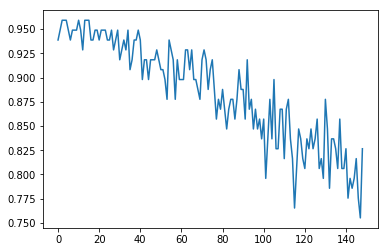

In [8]:
plt.plot(acc)
sio.savemat('acc.mat',{'nsr':nsr, 'acc':acc})

In [ ]:
sio.loadmat()